In [20]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from kedro.pipeline import *
from kedro.io import *
from kedro.runner import *
import seaborn as sns

import pickle
import os

In [25]:
# Load the paediatric data :AIOLOS19-12-2023
import pandas as pd
import numpy as np

# Load the data in xlsx file 
df = pd.read_csv('../data/04_feature/a.csv')

df

DATE_EXTRACT   CATEG_DIAG ANNEE_SEMAINE_ENTREE_RSS  NUM_SEMAINE  \
0        05/12/23       GRIPPE                    2 023         37.0   
1        05/12/23       GRIPPE                    2 023         37.0   
2        05/12/23       GRIPPE                    2 023         37.0   
3        05/12/23       GRIPPE                    2 023         37.0   
4        05/12/23       GRIPPE                    2 023         37.0   
...           ...          ...                      ...          ...   
1993     12/12/23  IR_AUTVIRUS                    2 023         49.0   
1994     12/12/23  IR_AUTVIRUS                    2 023         49.0   
1995     12/12/23  IR_AUTVIRUS                    2 023         49.0   
1996     12/12/23  IR_AUTVIRUS                    2 023         49.0   
1997     12/12/23  IR_AUTVIRUS                    2 023         49.0   

       LIB_SEM        CLAS_AGE    CLAS_DUREERSS  NRSS  NIPP  
0     11/09/23   Moins de 1 an        < 2 jours     0     0  
1     11/09/23   [1 - 5[ an(s)        < 2 jours     0     0  
2     11/09/23    [5 - 20[ ans        < 2 jours     0     0  
3     11/09/23   [20 - 50[ ans        < 2 jours     0     0  
4     11/09/23   [50 - 65[ ans        < 2 jours     0     0  
...        ...             ...              ...   ...   ...  
1993  04/12/23   [1 - 5[ an(s)  5 jours et plus     0     0  
1994  04/12/23    [5 - 20[ ans  5 jours et plus     0     0  
1995  04/12/23   [20 - 50[ ans  5 jours et plus     0     0  
1996  04/12/23   [50 - 65[ ans  5 jours et plus     0     0  
1997  04/12/23  65 ans et plus  5 jours et plus     0     0  

[1998 rows x 9 columns]

In [26]:
unique_dates = df['DATE_EXTRACT'].unique()
unique_dates

array(['05/12/23', '12/12/23'], dtype=object)

In [23]:
df['DATE_EXTRACT'] = pd.to_datetime(df['DATE_EXTRACT'])

# Trouver l'index de la ligne ayant la DATE_EXTRACT la plus récente pour chaque groupe
idx = df.groupby(['LIB_SEM', 'CATEG_DIAG', 'CLAS_AGE', 'CLAS_DUREERSS'])['DATE_EXTRACT'].idxmax()

# Filtrer le DataFrame original avec ces indices
df = df.loc[idx]
df

[01/18/24 14:46:10] WARNING  C:\Users\jrubio\AppData\Local\Temp\ipykernel_25268\1884136494.py:1:    ]8;id=667898;file://c:\ProgramData\Anaconda3\envs\kedro-environment\lib\warnings.py\warnings.py]8;;\:]8;id=937002;file://c:\ProgramData\Anaconda3\envs\kedro-environment\lib\warnings.py#109\109]8;;\
                             UserWarning: Could not infer format, so each element will be parsed                   
                             individually, falling back to `dateutil`. To ensure parsing is                        
                             consistent and as-expected, please specify a format.                                  
                               df['DATE_EXTRACT'] = pd.to_datetime(df['DATE_EXTRACT'])                             
                                                                                                                   

DATE_EXTRACT CATEG_DIAG ANNEE_SEMAINE_ENTREE_RSS  NUM_SEMAINE   LIB_SEM  \
1061   2023-12-12   COVID-19                    2 023         40.0  02/10/23   
1049   2023-12-12   COVID-19                    2 023         40.0  02/10/23   
1055   2023-12-12   COVID-19                    2 023         40.0  02/10/23   
1056   2023-12-12   COVID-19                    2 023         40.0  02/10/23   
1044   2023-12-12   COVID-19                    2 023         40.0  02/10/23   
...           ...        ...                      ...          ...       ...   
470    2023-12-12        RSV                    2 023         44.0  30/10/23   
476    2023-12-12        RSV                    2 023         44.0  30/10/23   
484    2023-12-12        RSV                    2 023         44.0  30/10/23   
472    2023-12-12        RSV                    2 023         44.0  30/10/23   
478    2023-12-12        RSV                    2 023         44.0  30/10/23   

            CLAS_AGE    CLAS_DUREERSS  NRSS  NIPP  
1061  65 ans et plus  5 jours et plus    33    33  
1049  65 ans et plus        < 2 jours     7     7  
1055  65 ans et plus    [2 - 5[ jours    13     3  
1056   Moins de 1 an  5 jours et plus     0     0  
1044   Moins de 1 an        < 2 jours     1     0  
...              ...              ...   ...   ...  
470     [5 - 20[ ans        < 2 jours     0     0  
476     [5 - 20[ ans    [2 - 5[ jours     0     0  
484    [50 - 65[ ans  5 jours et plus     0     0  
472    [50 - 65[ ans        < 2 jours     0     0  
478    [50 - 65[ ans    [2 - 5[ jours     0     0  

[1080 rows x 9 columns]

In [24]:
unique_dates = df['DATE_EXTRACT'].unique()
unique_dates


<DatetimeArray>
['2023-12-12 00:00:00', '2023-05-12 00:00:00']
Length: 2, dtype: datetime64[ns]

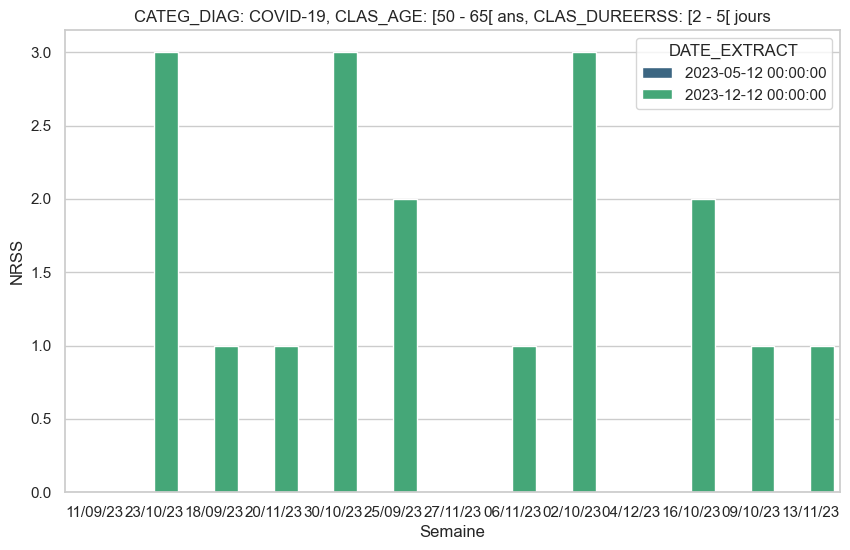

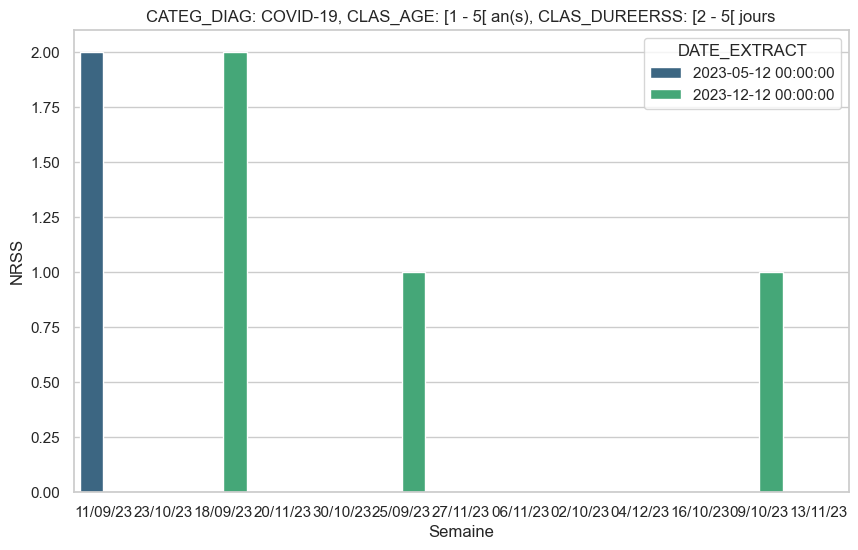

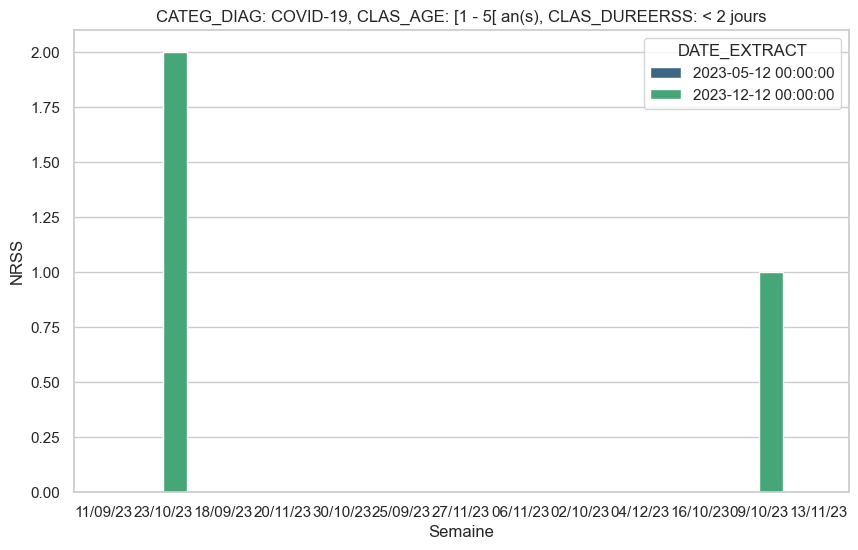

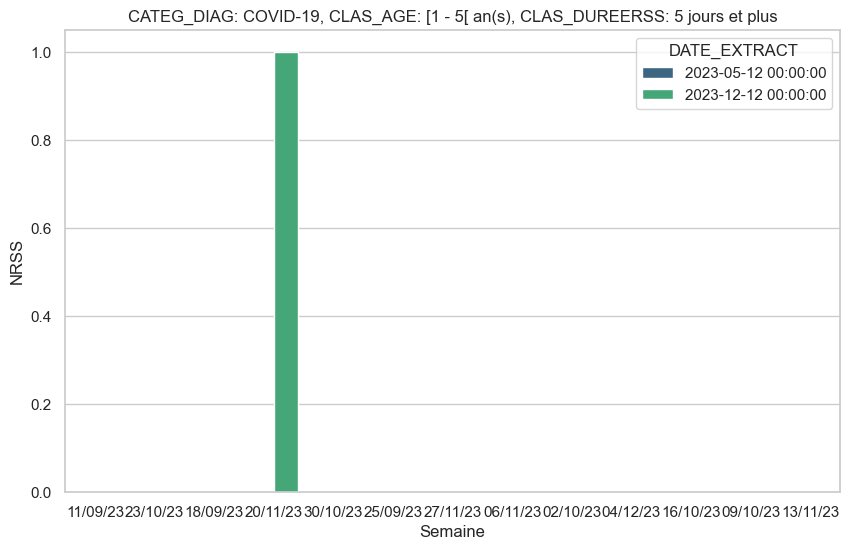

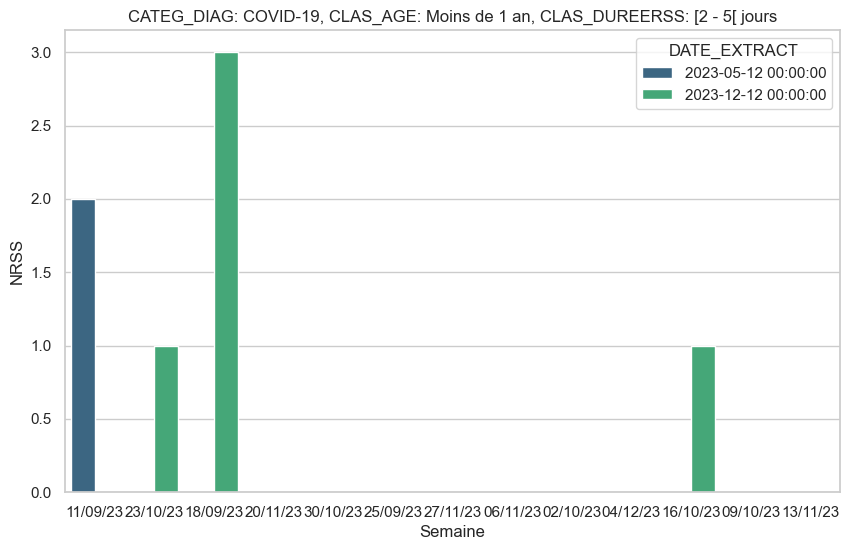

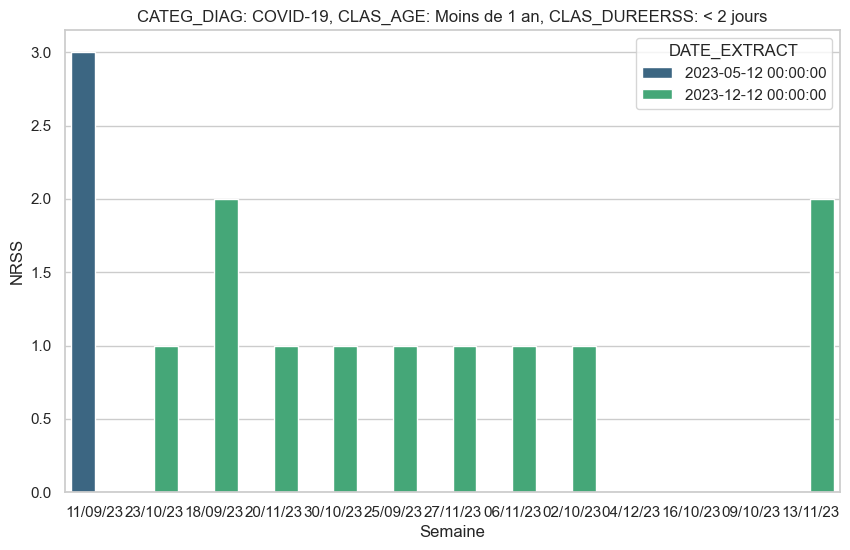

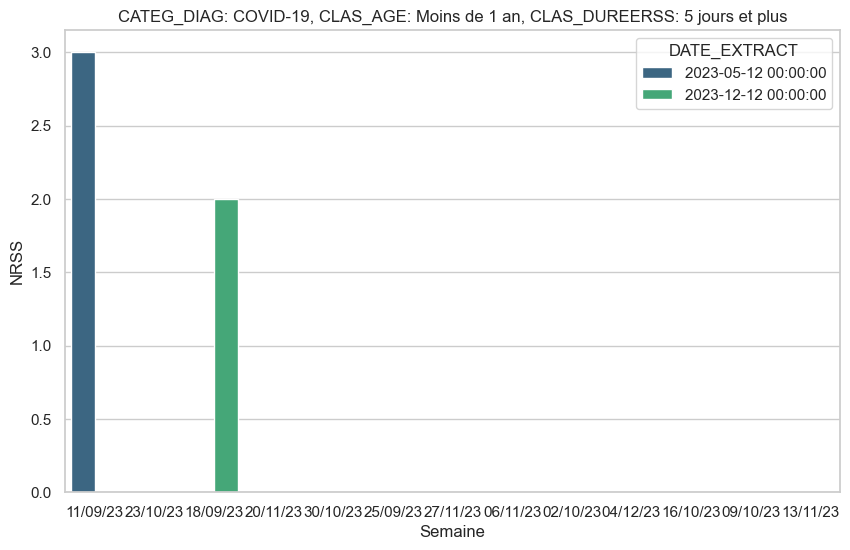

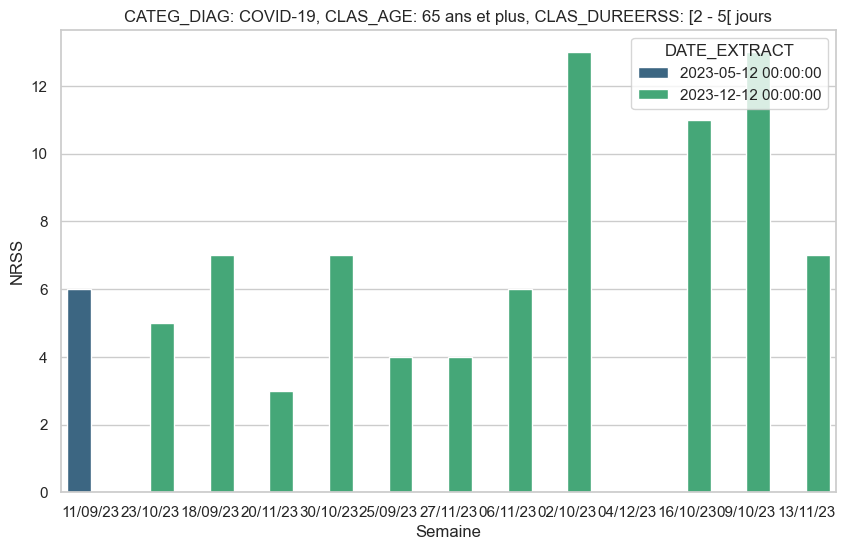

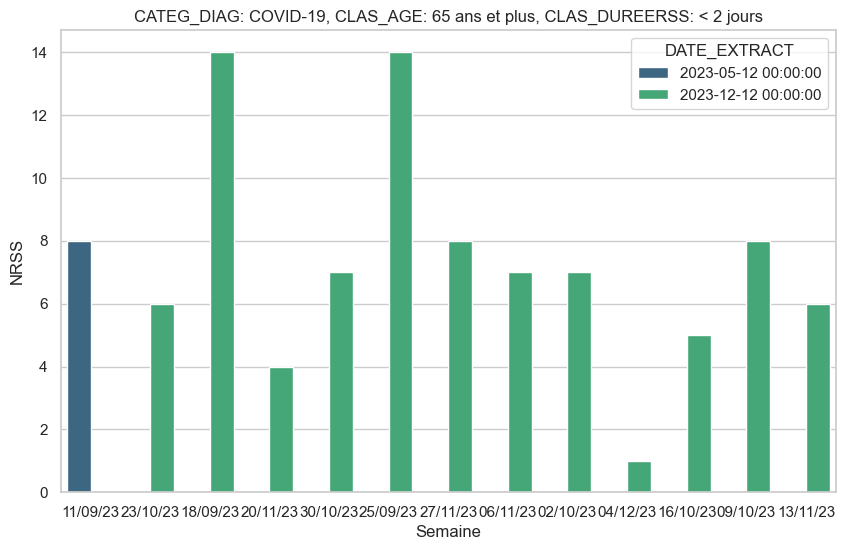

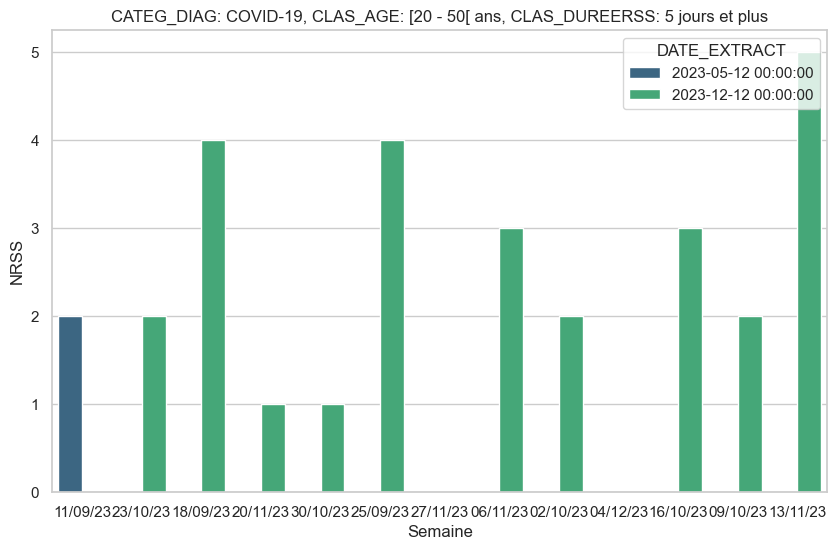

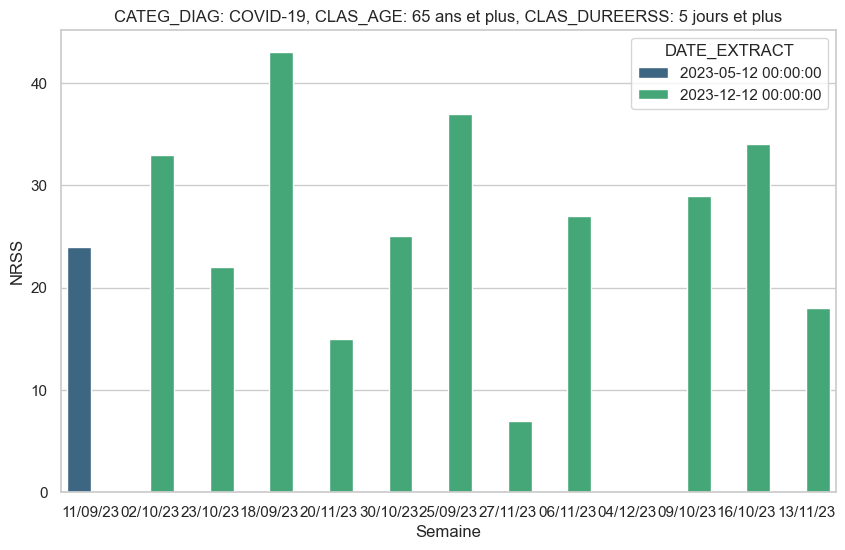

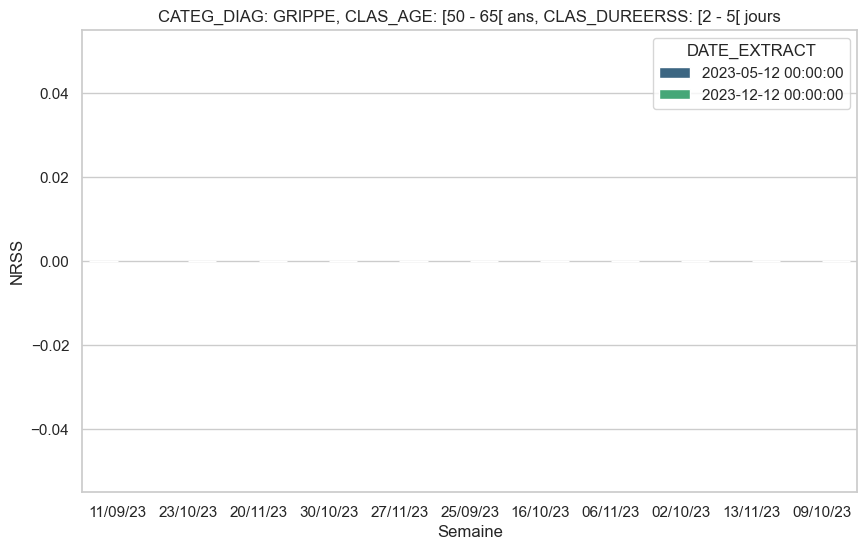

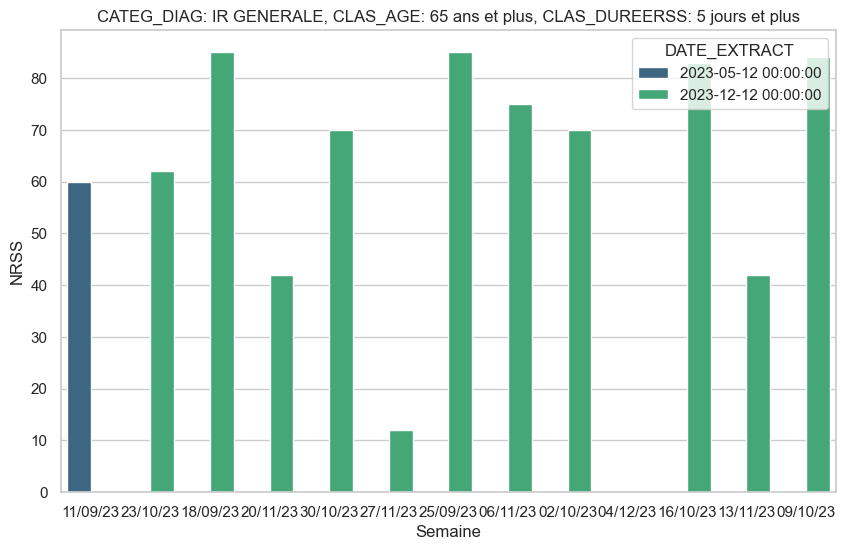

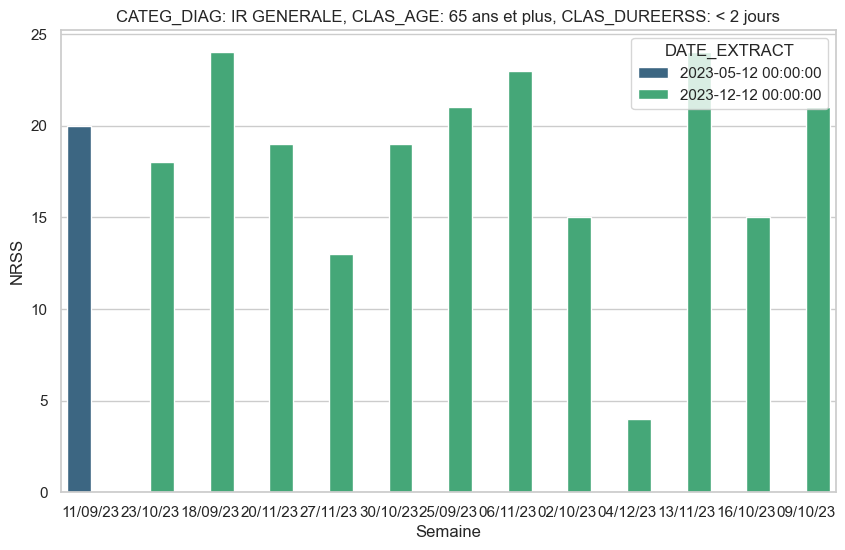

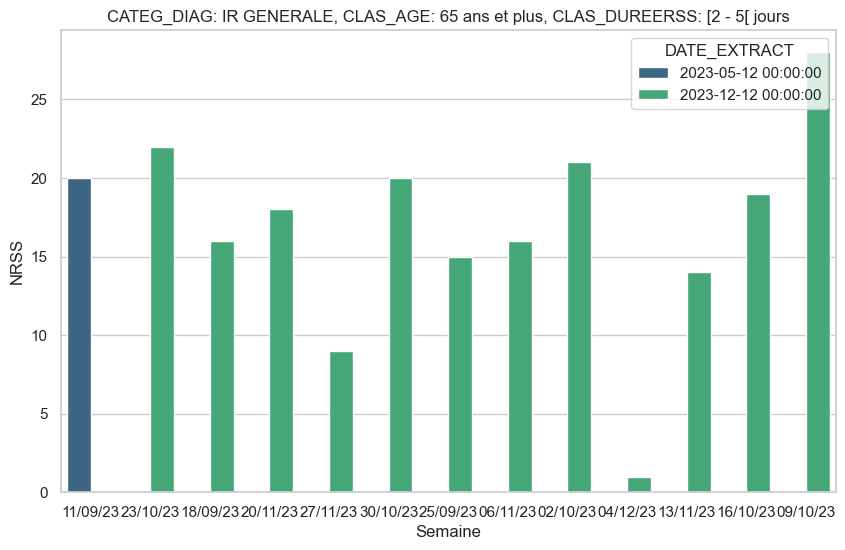

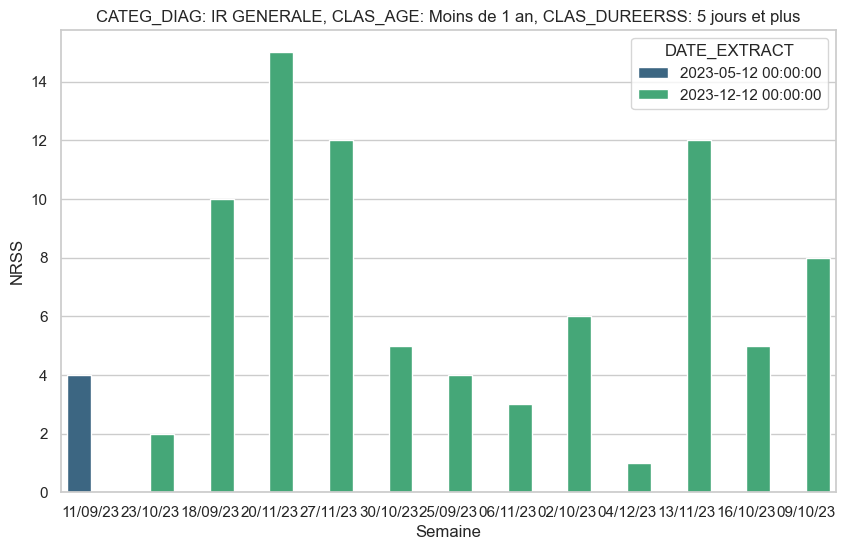

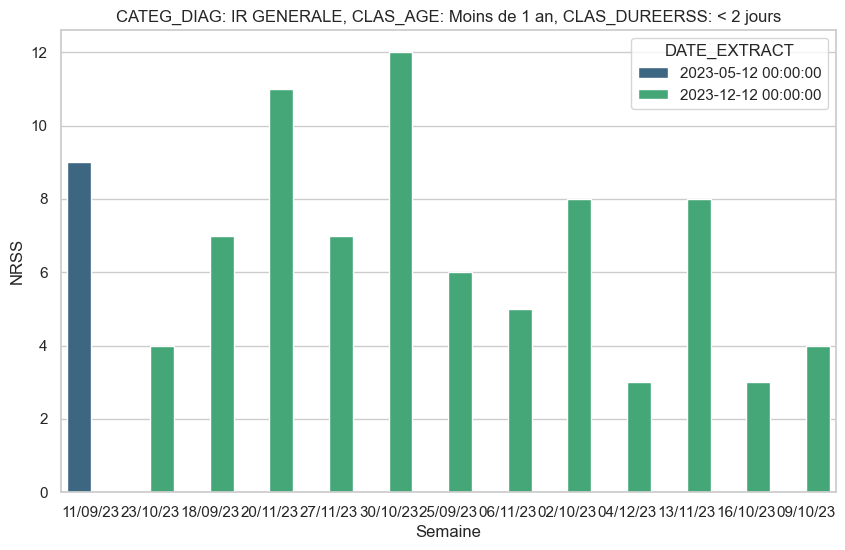

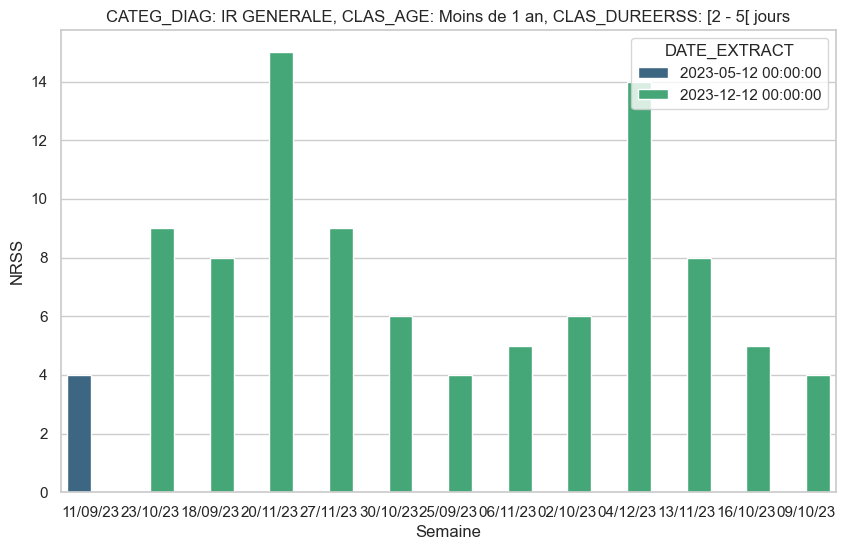

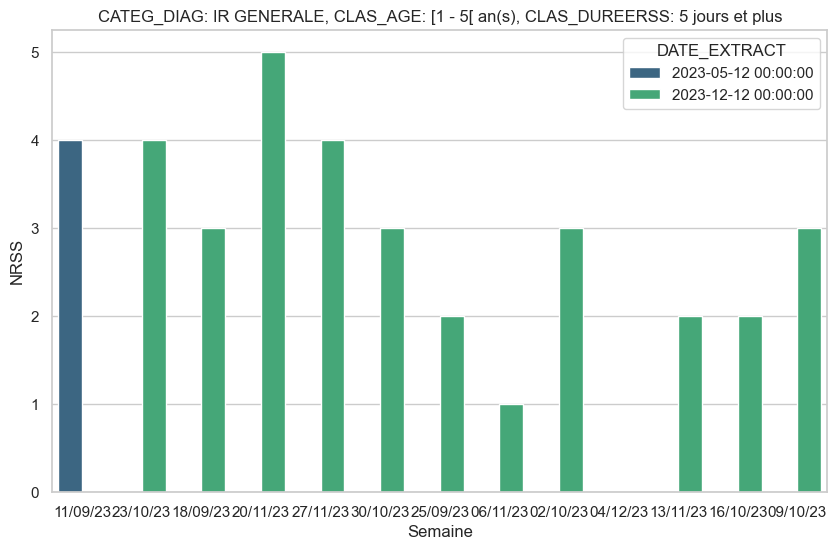

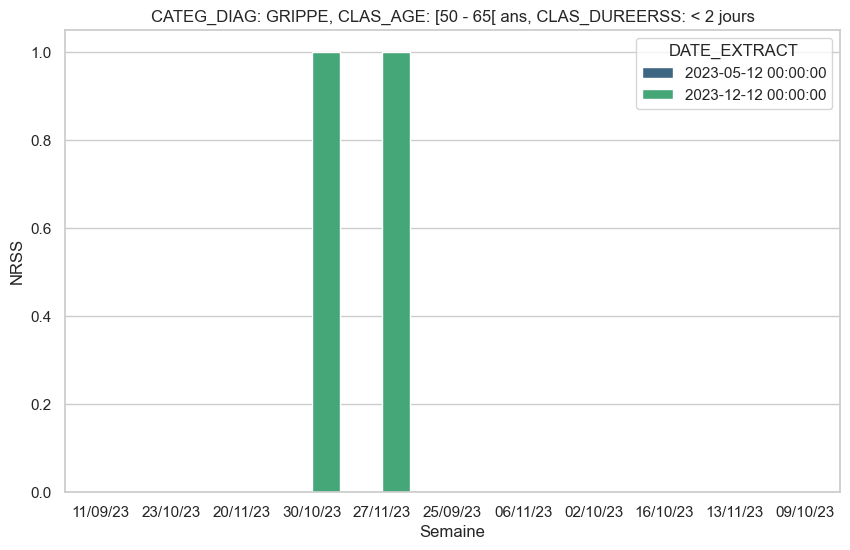

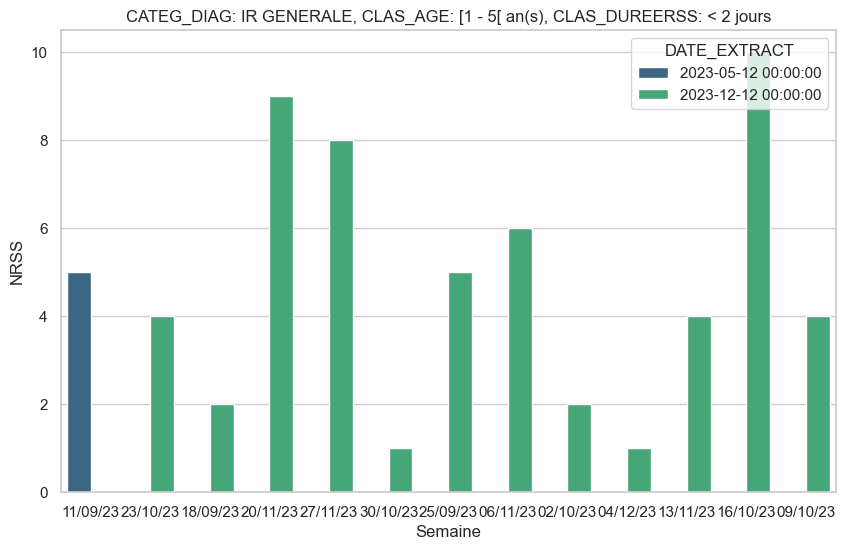

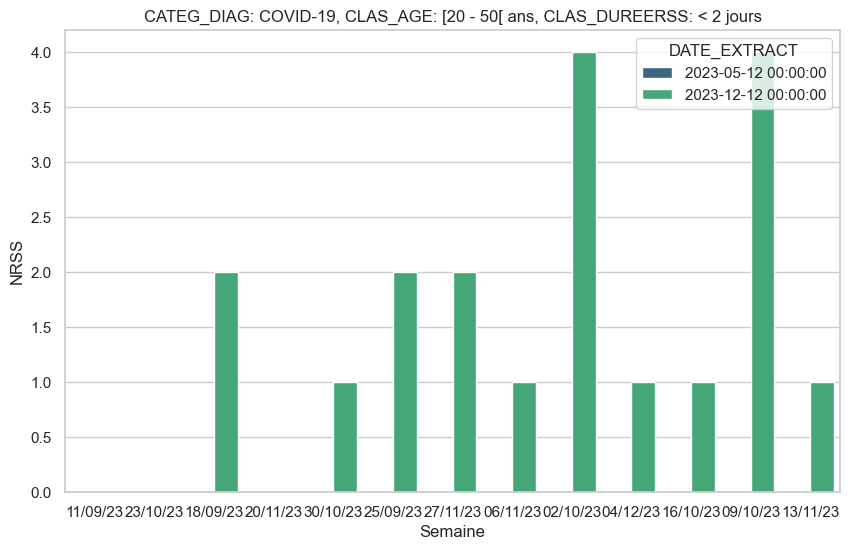

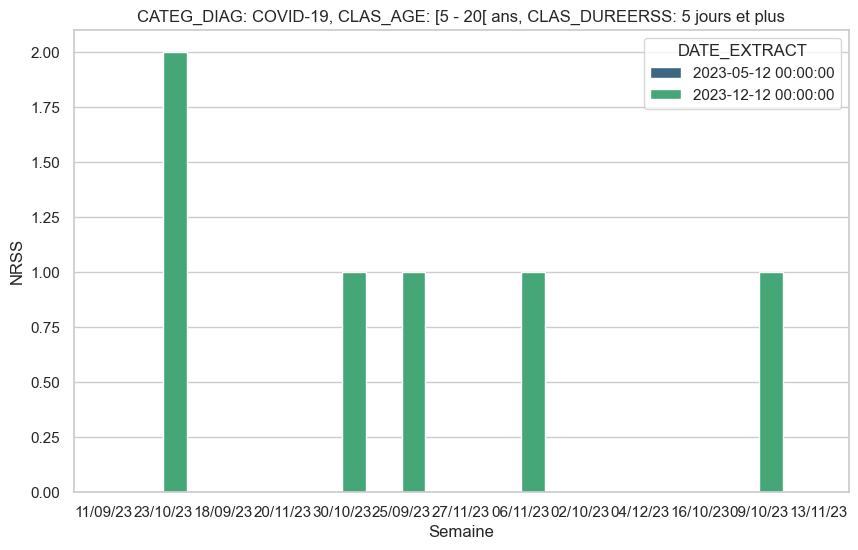

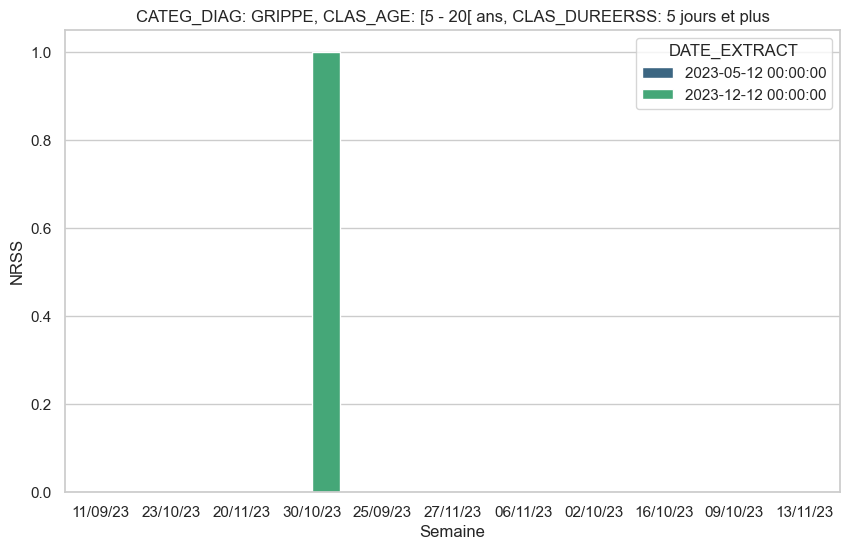

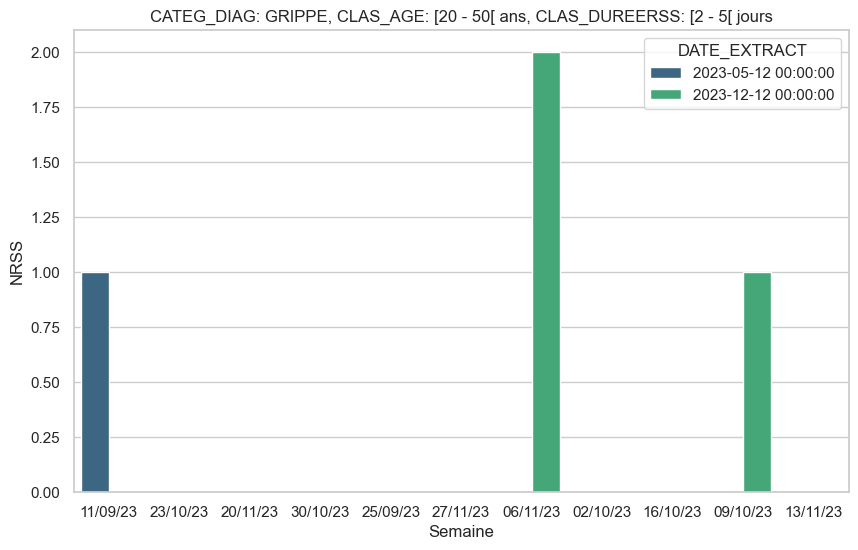

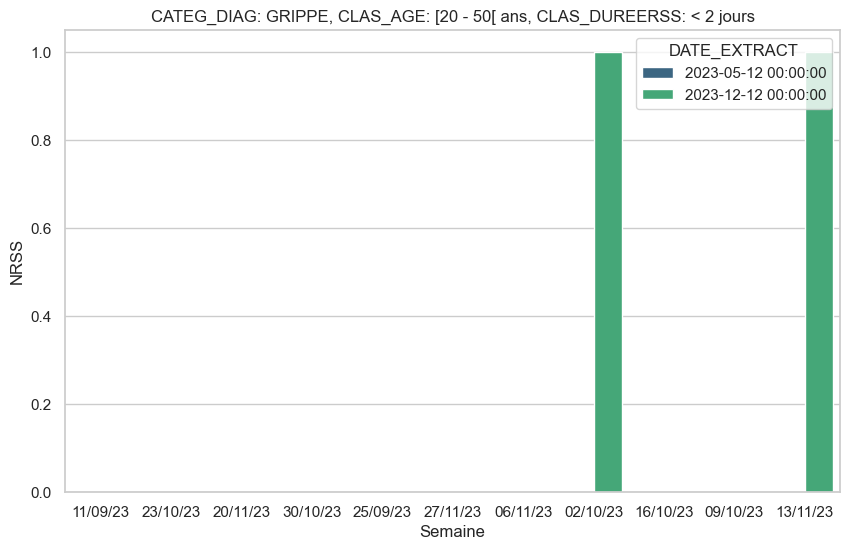

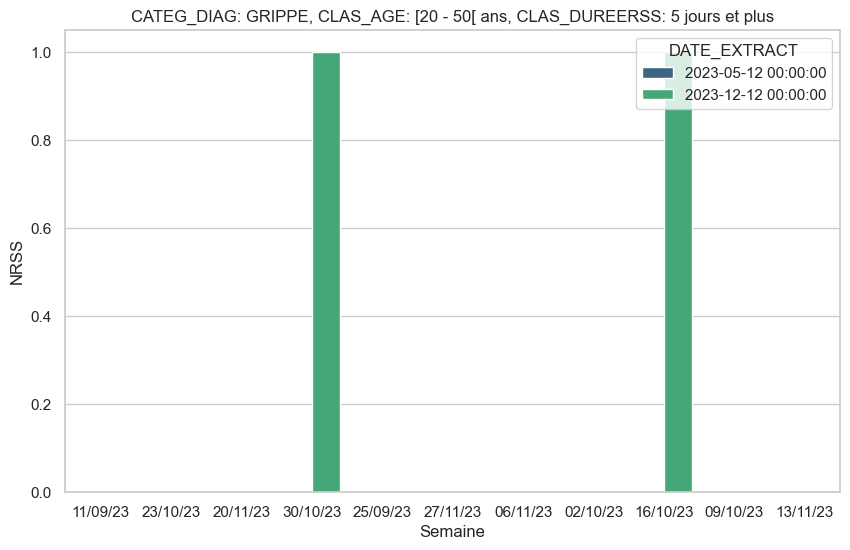

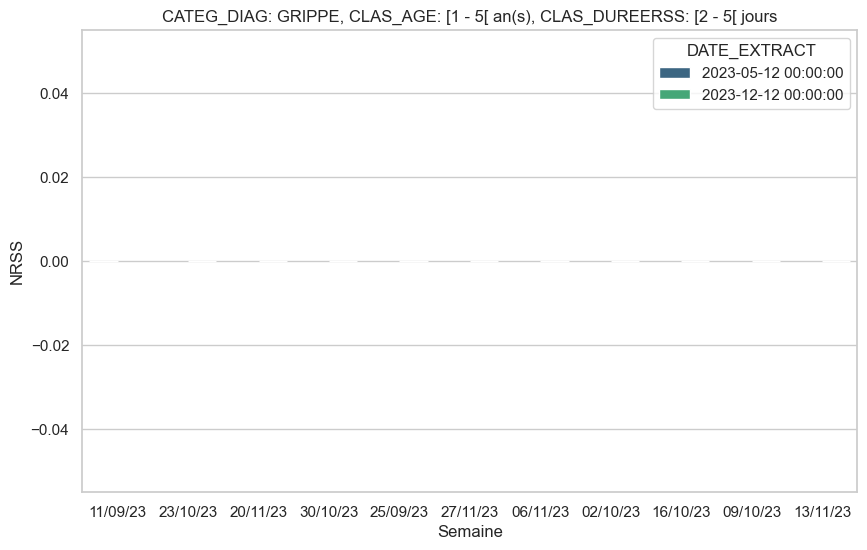

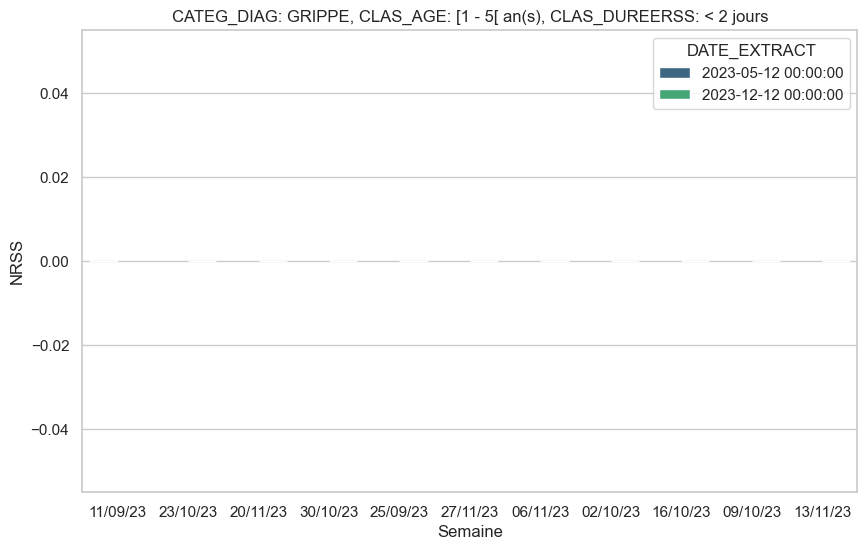

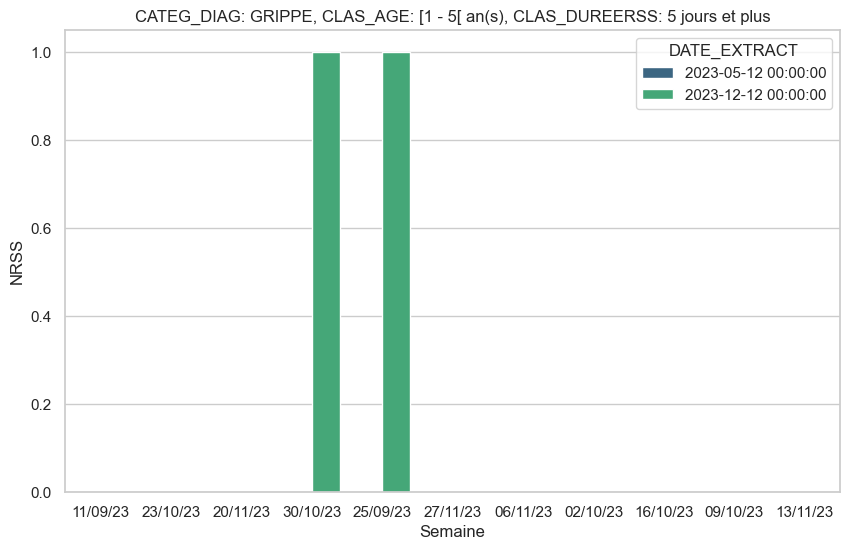

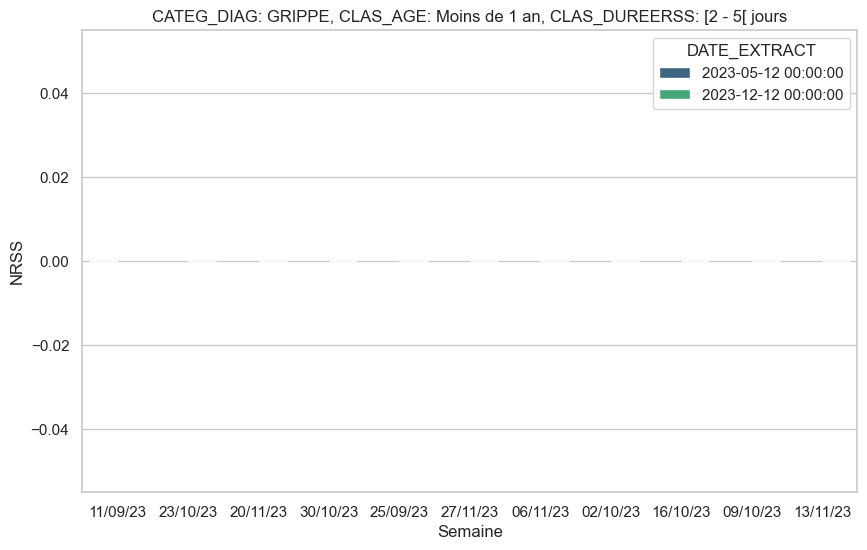

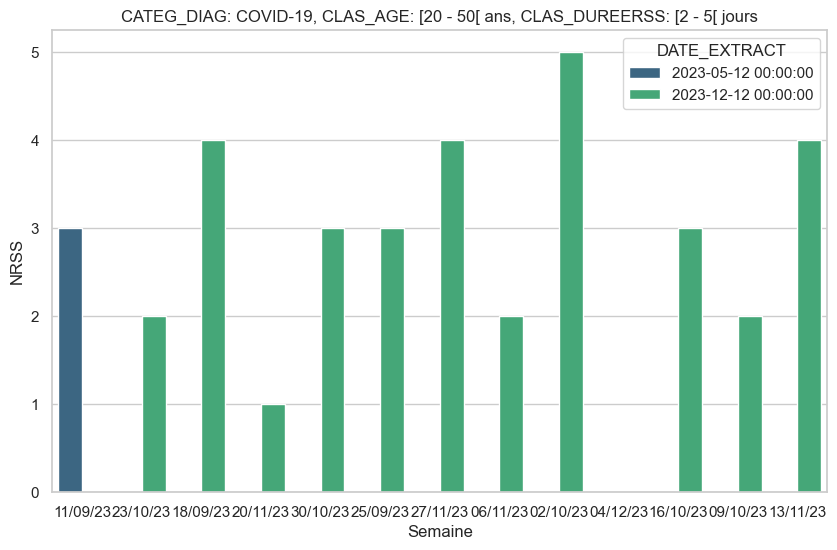

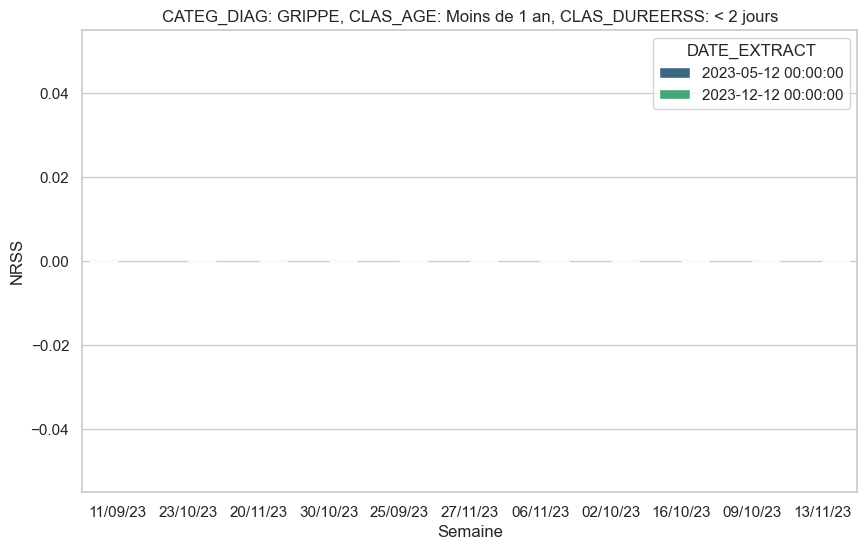

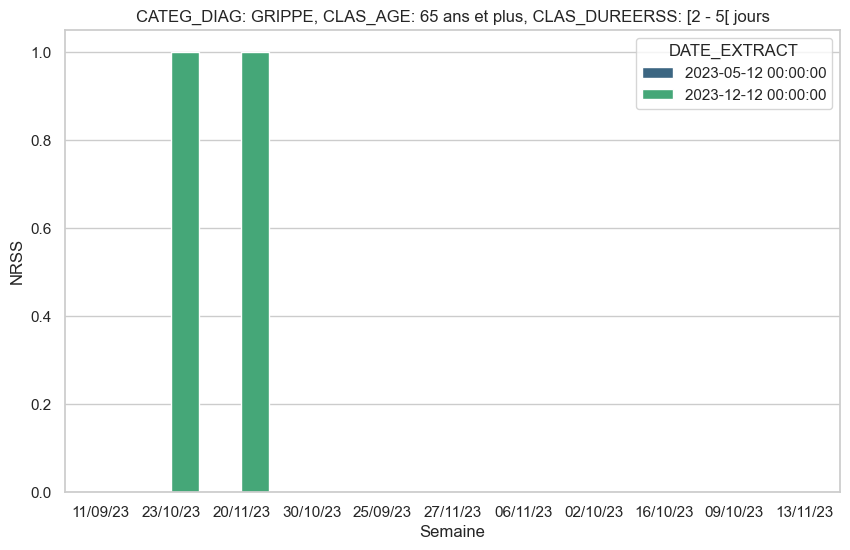

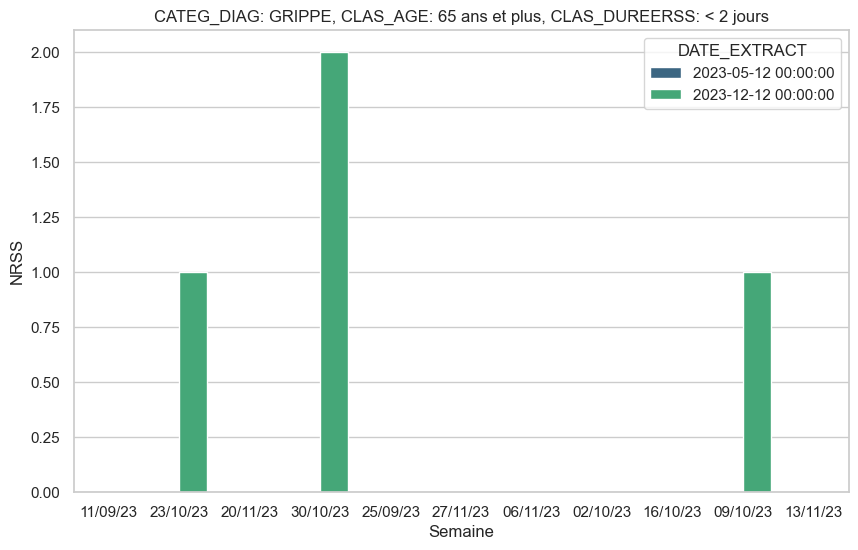

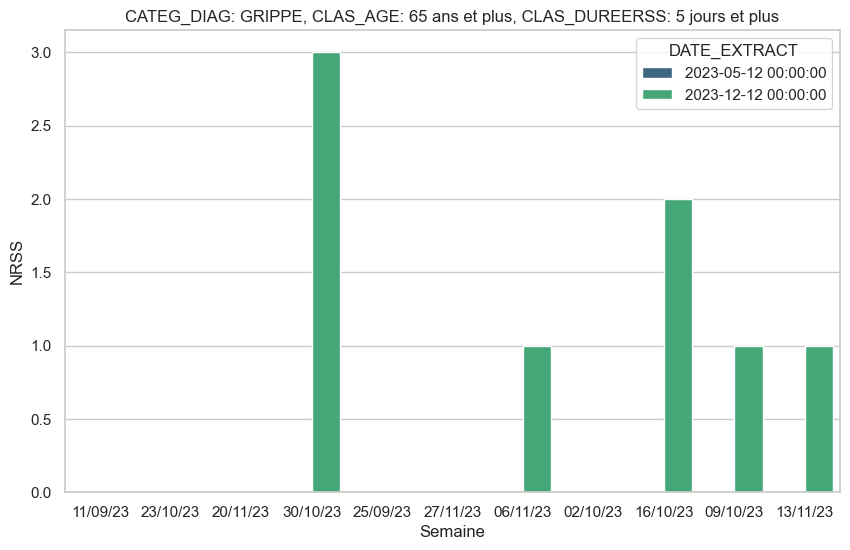

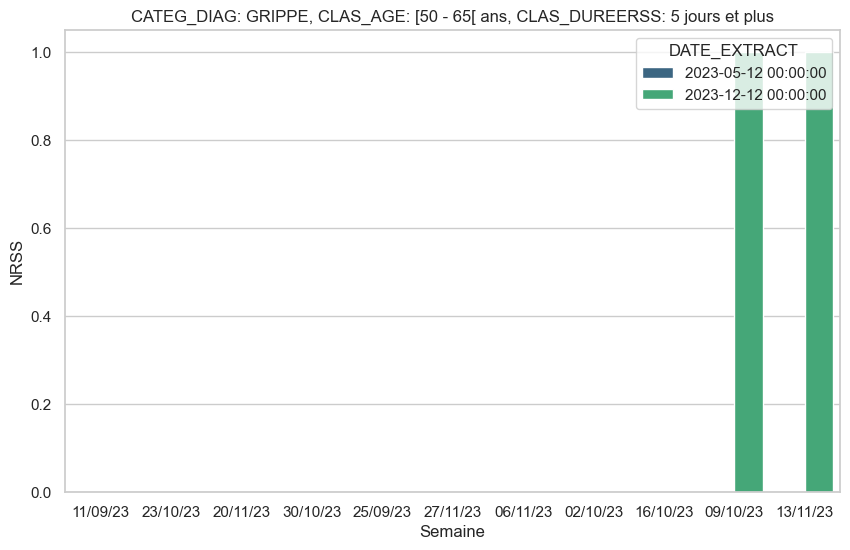

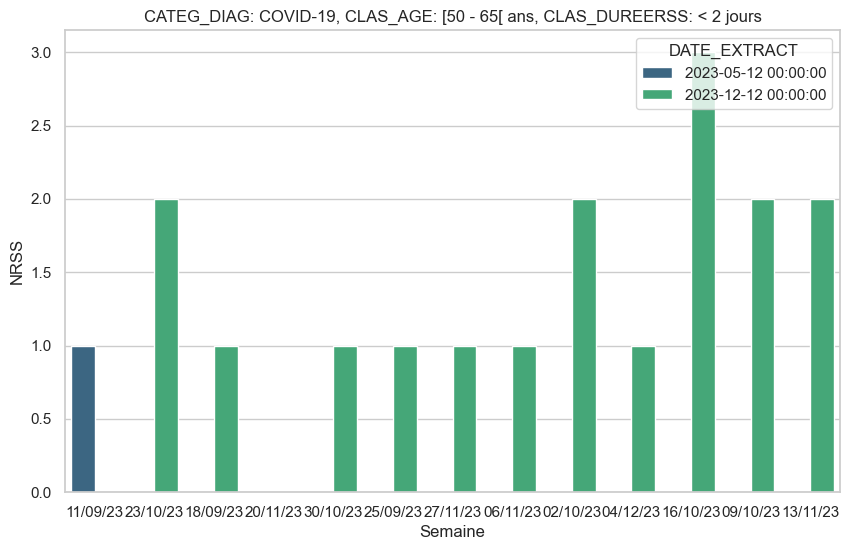

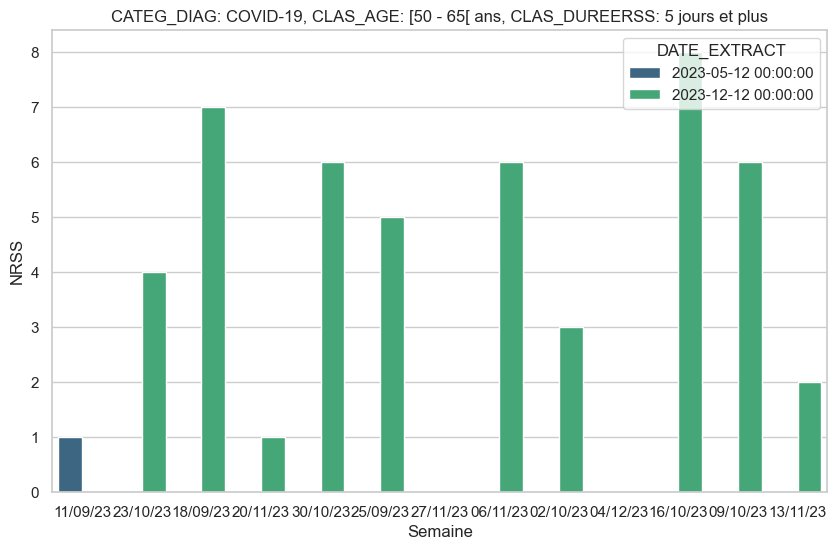

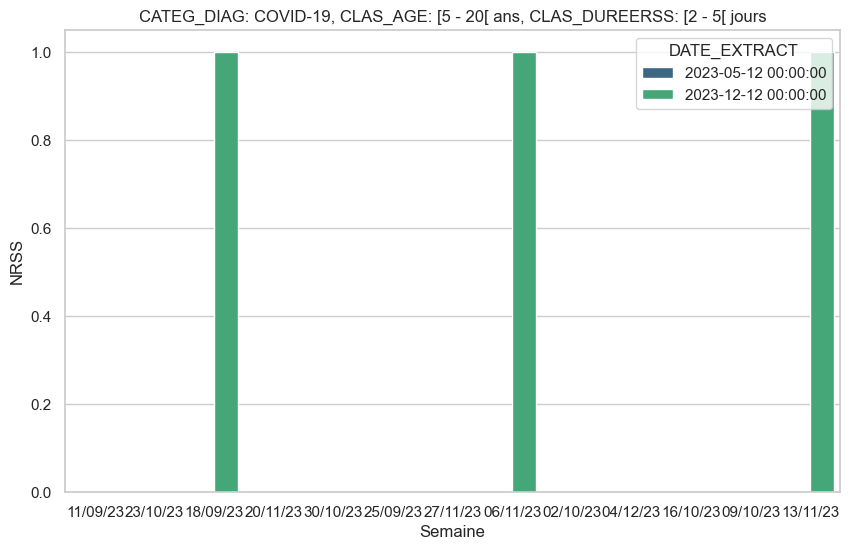

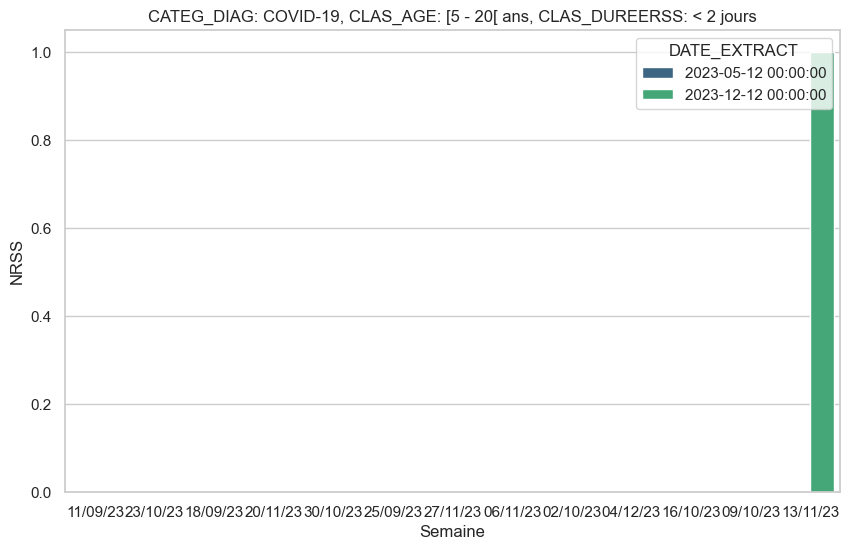

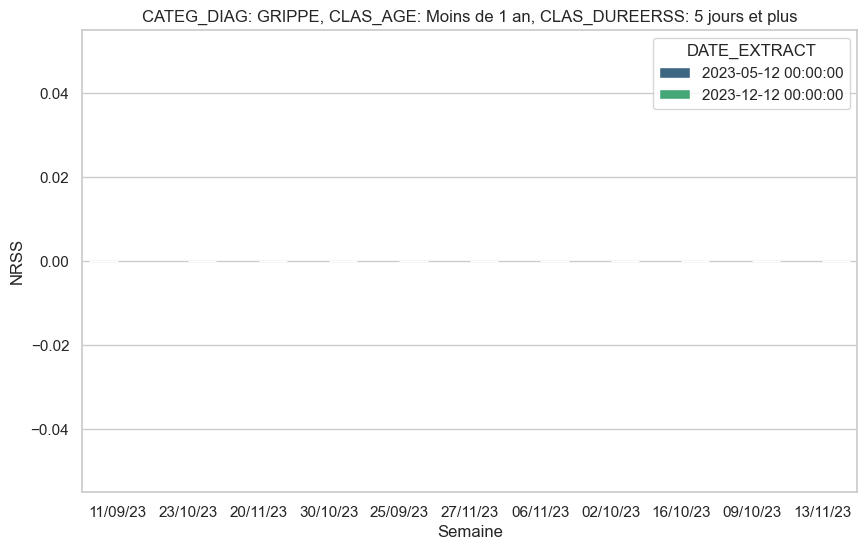

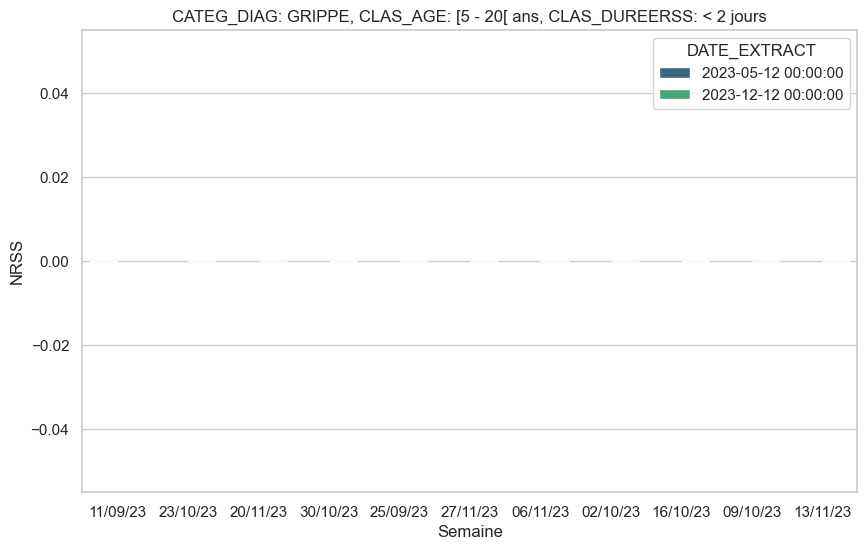

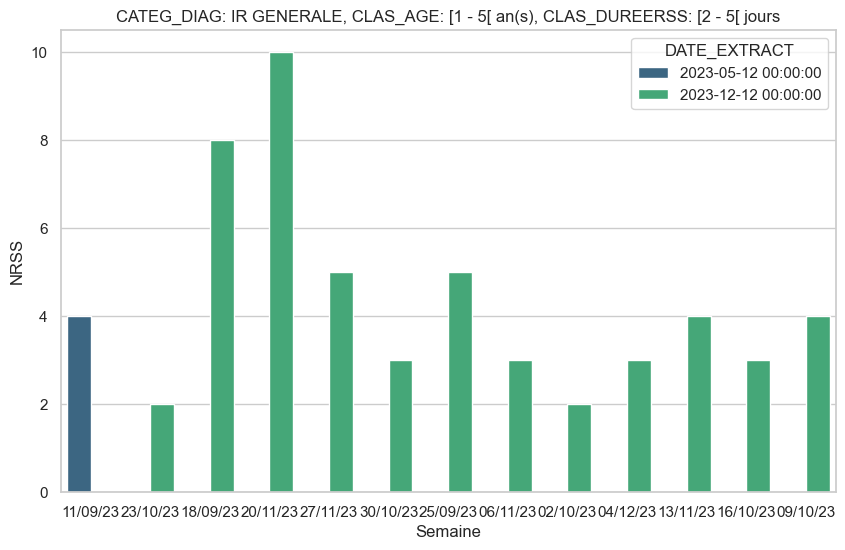

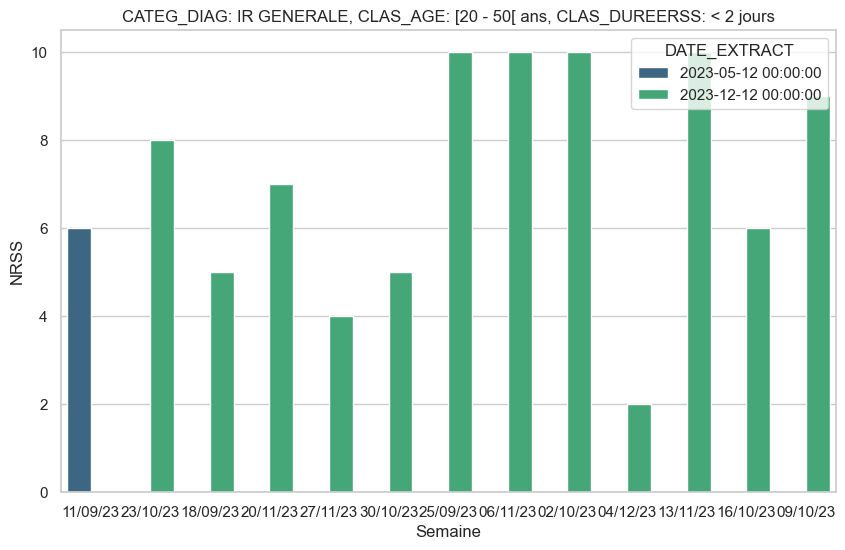

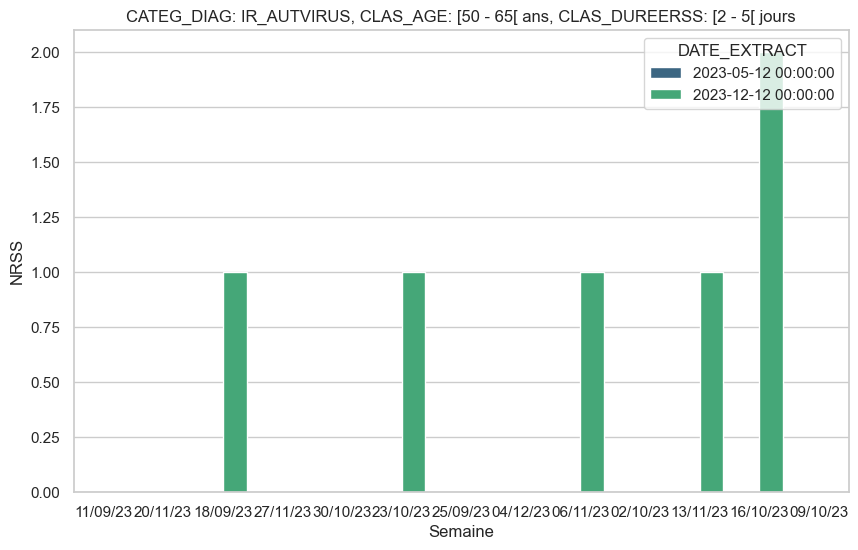

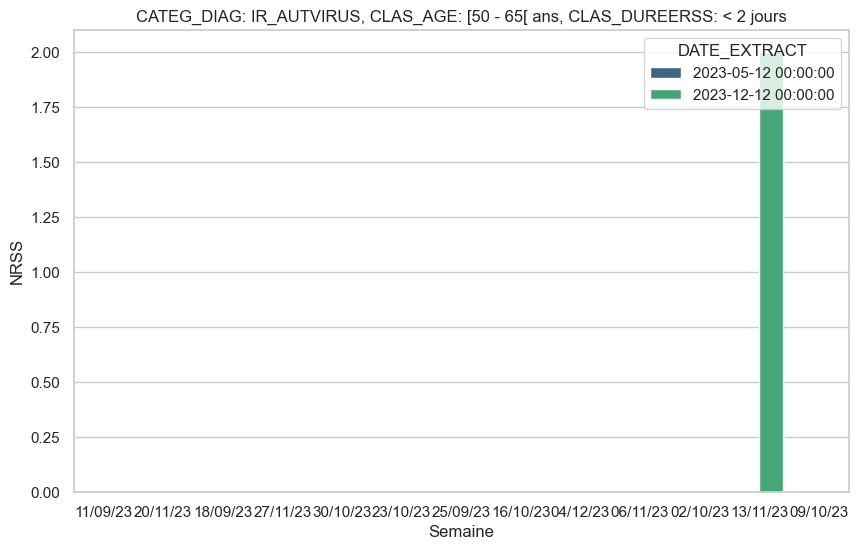

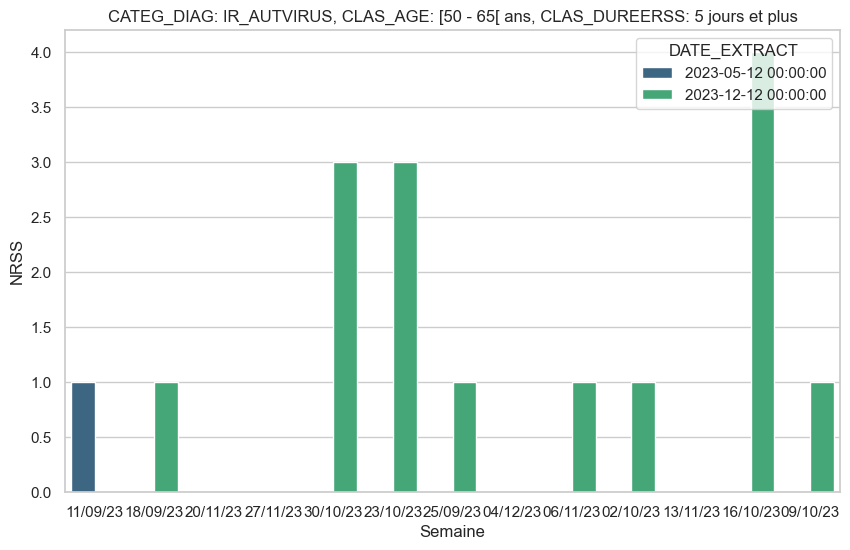

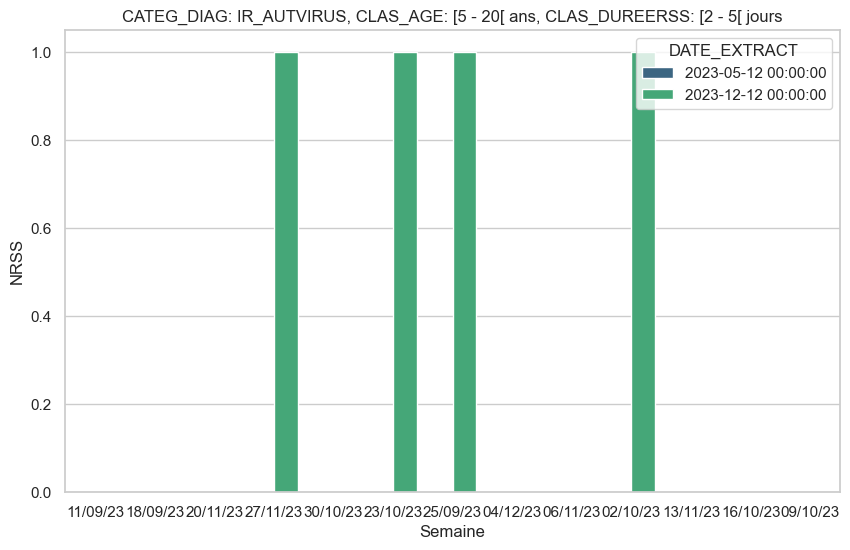

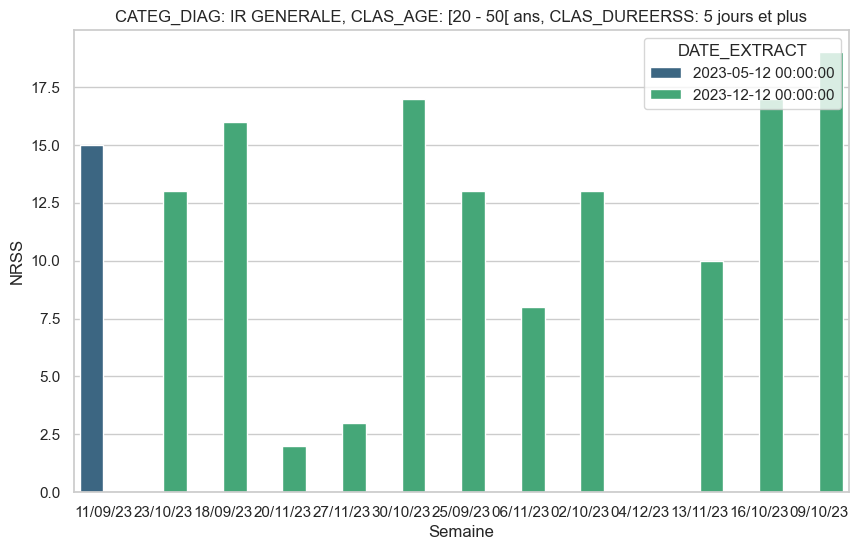

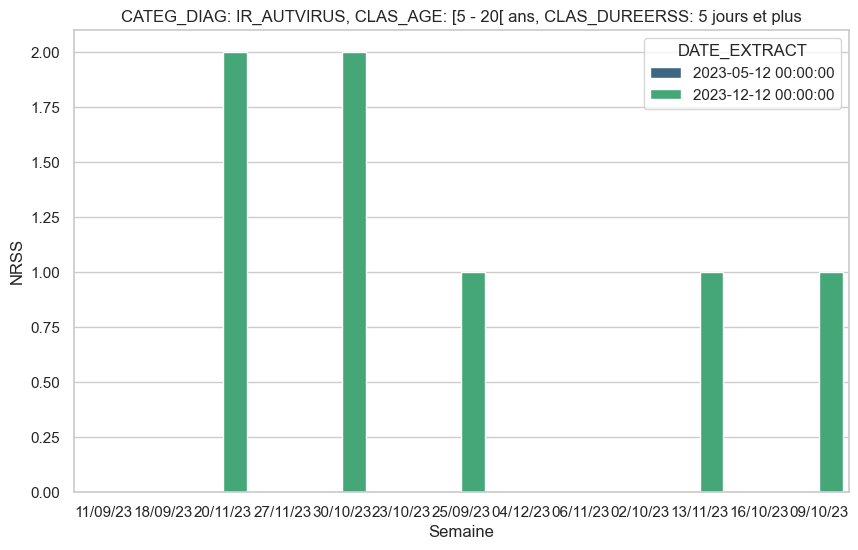

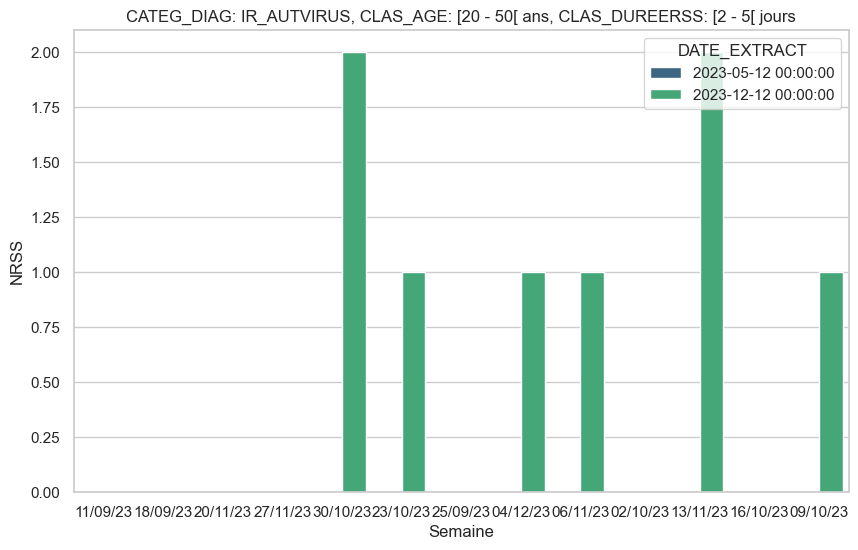

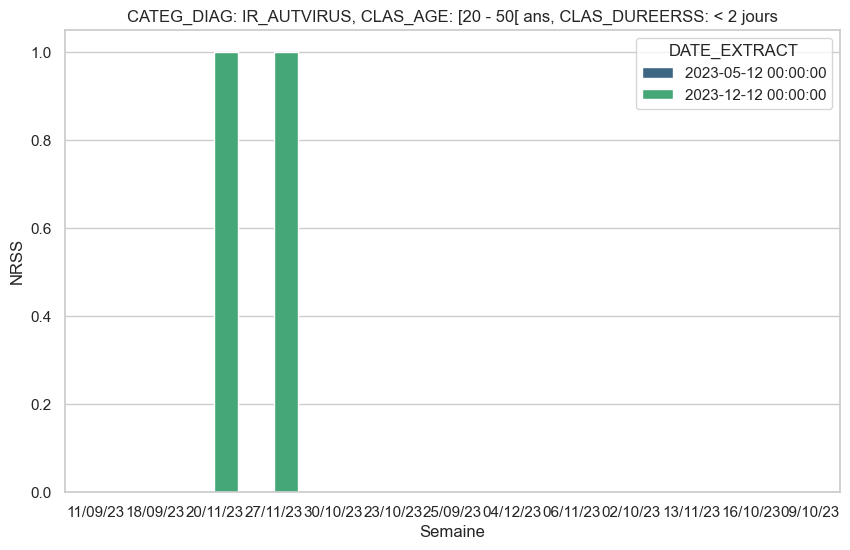

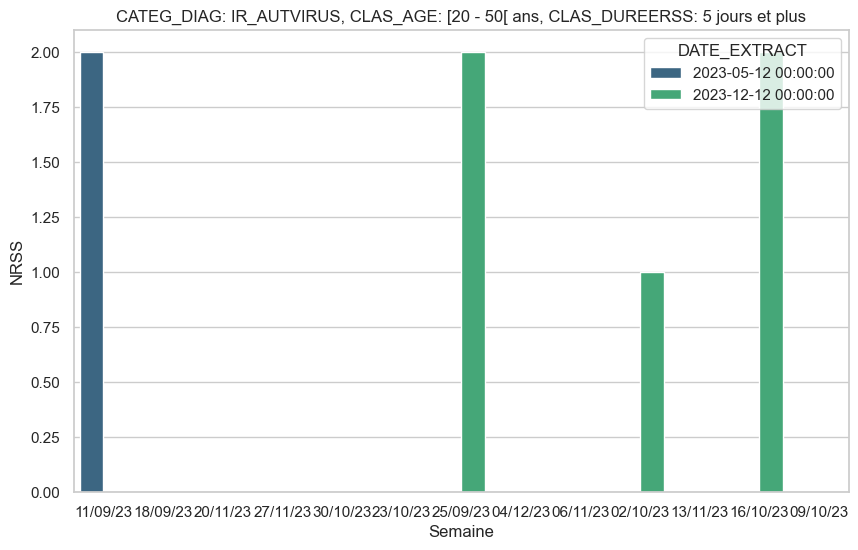

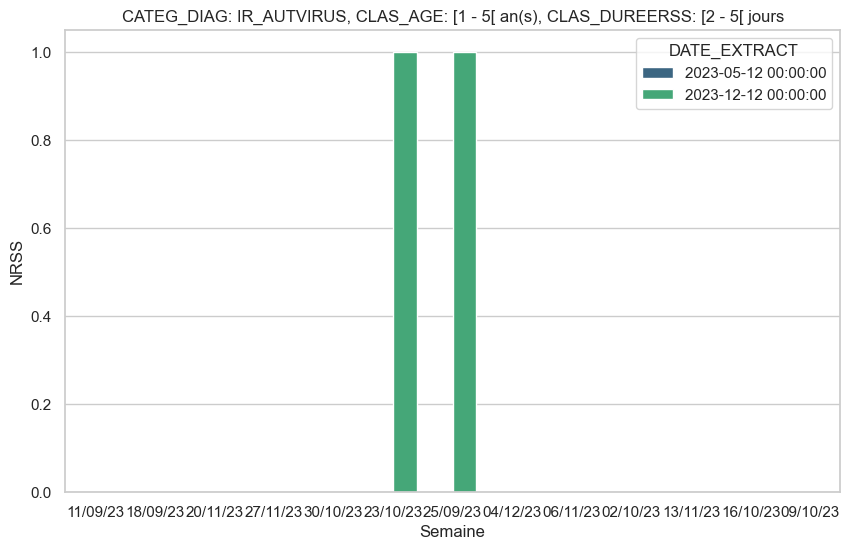

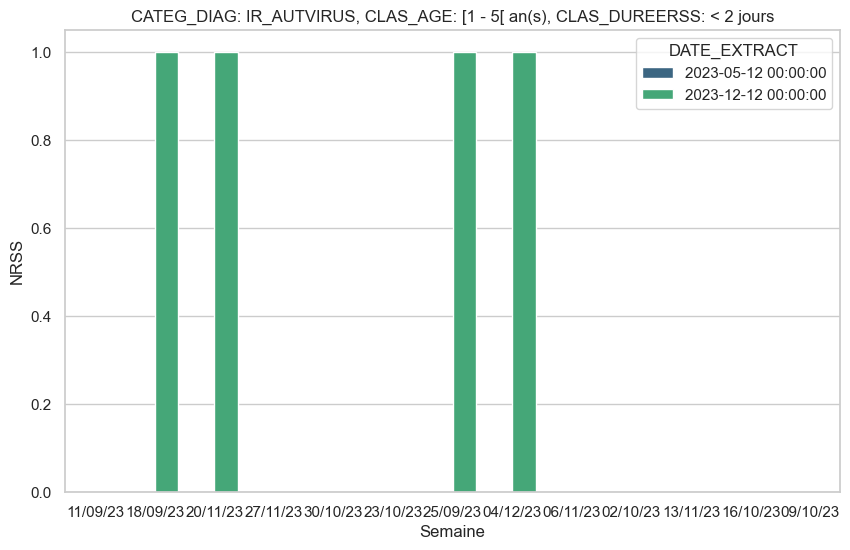

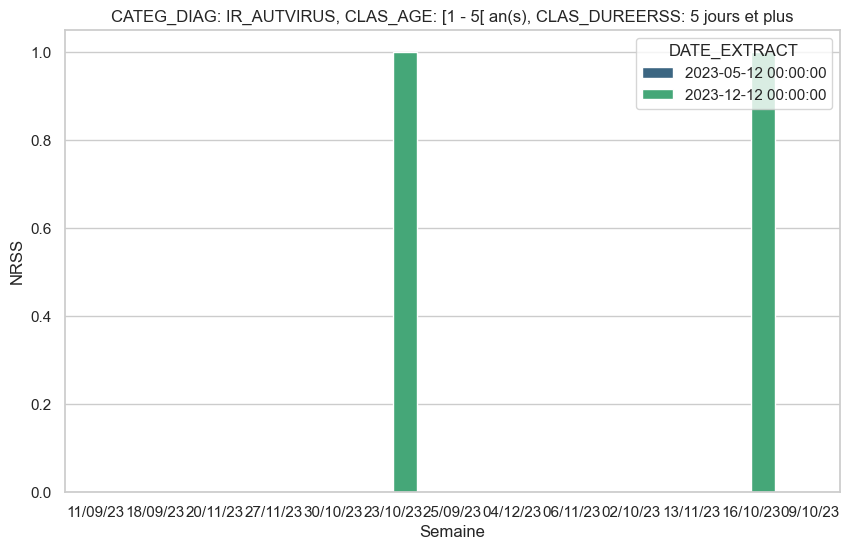

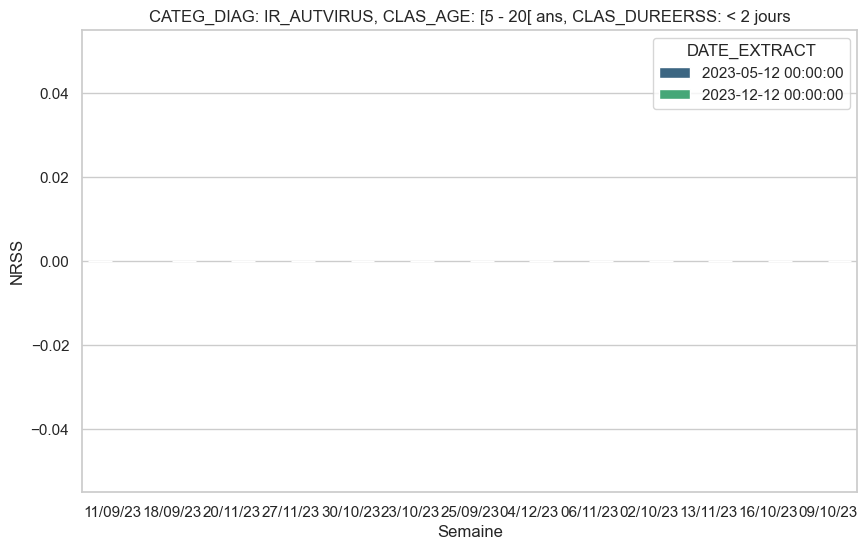

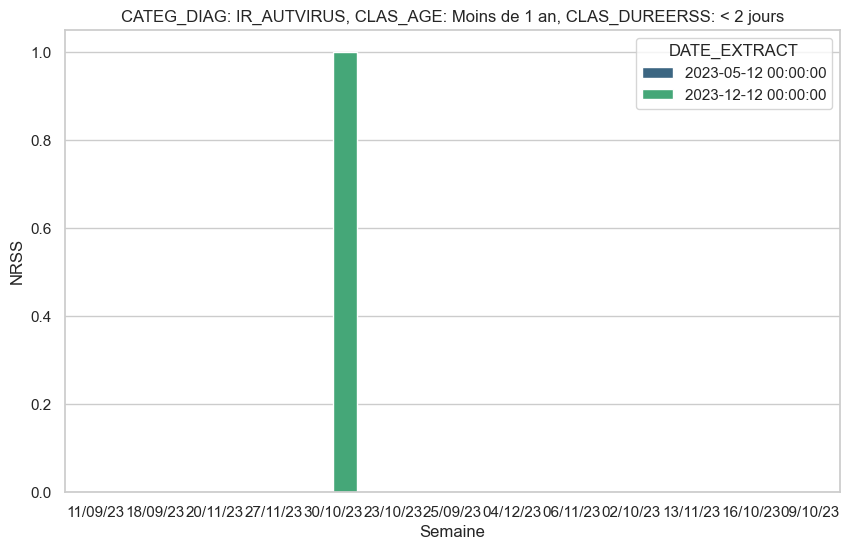

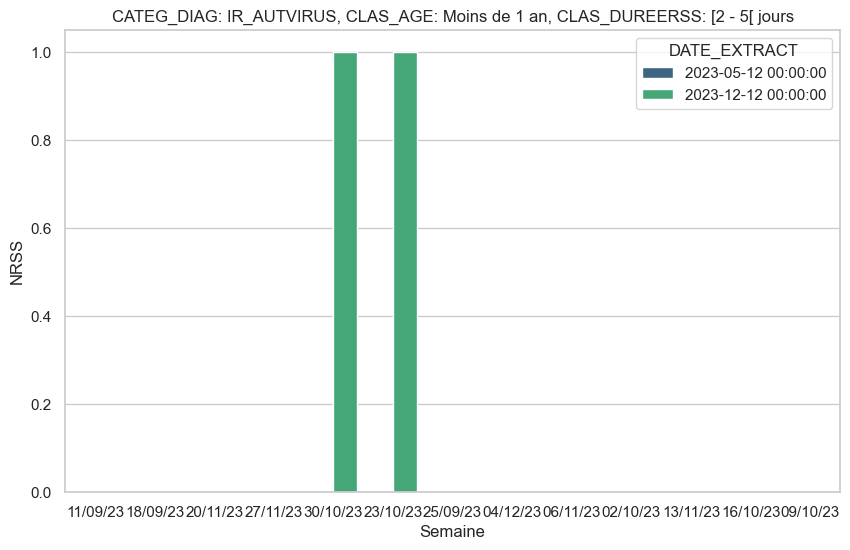

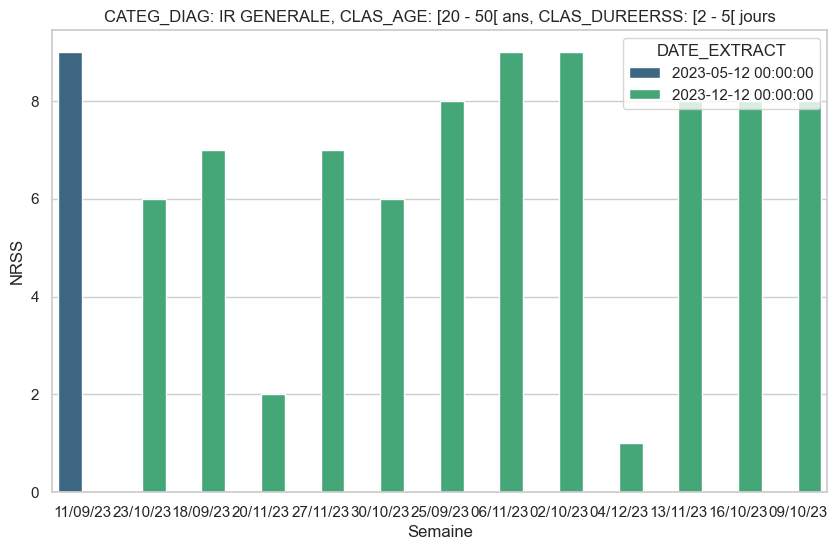

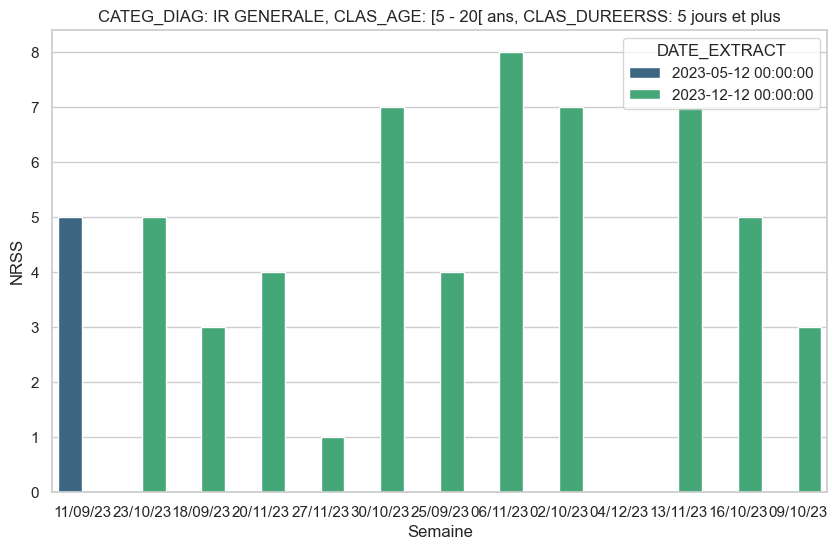

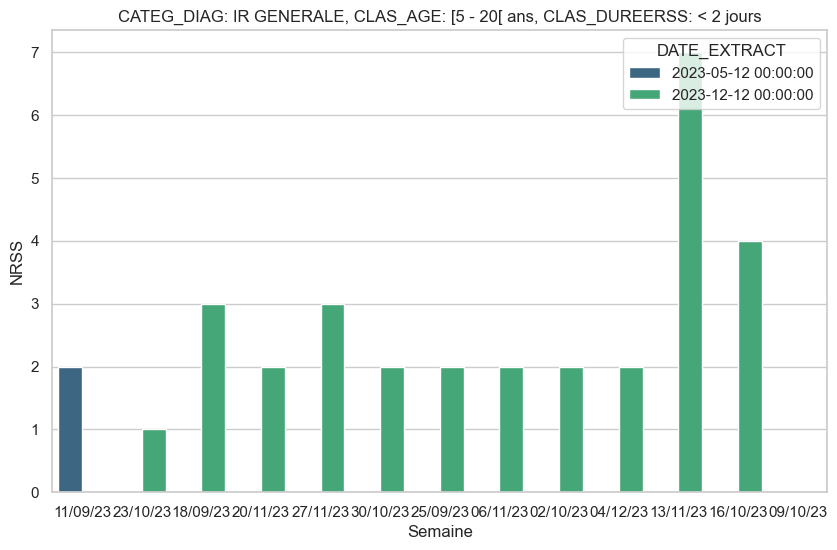

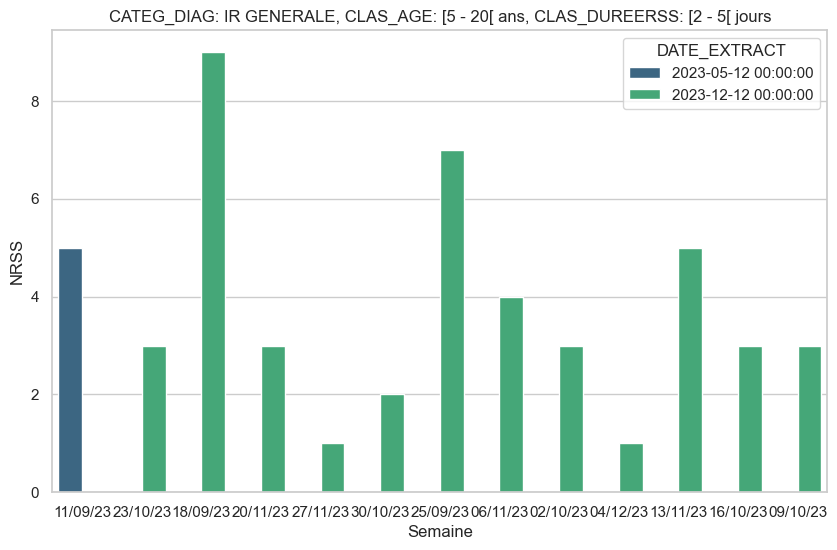

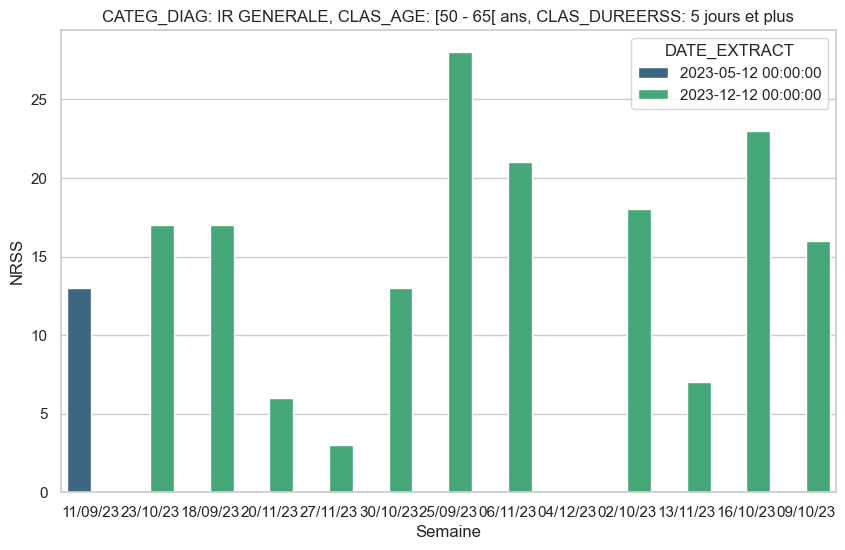

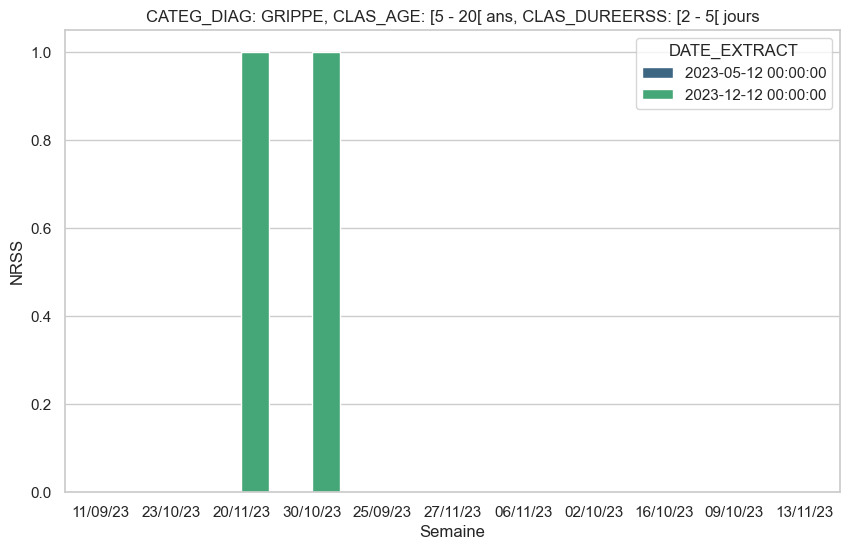

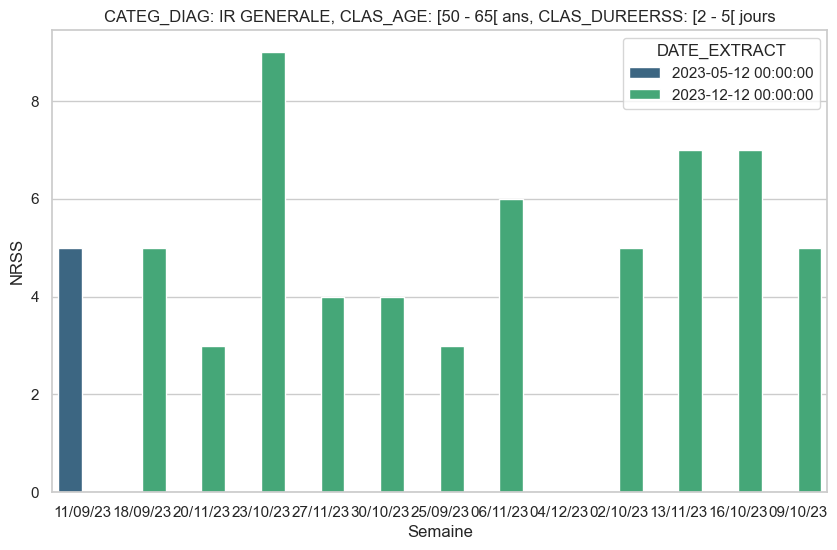

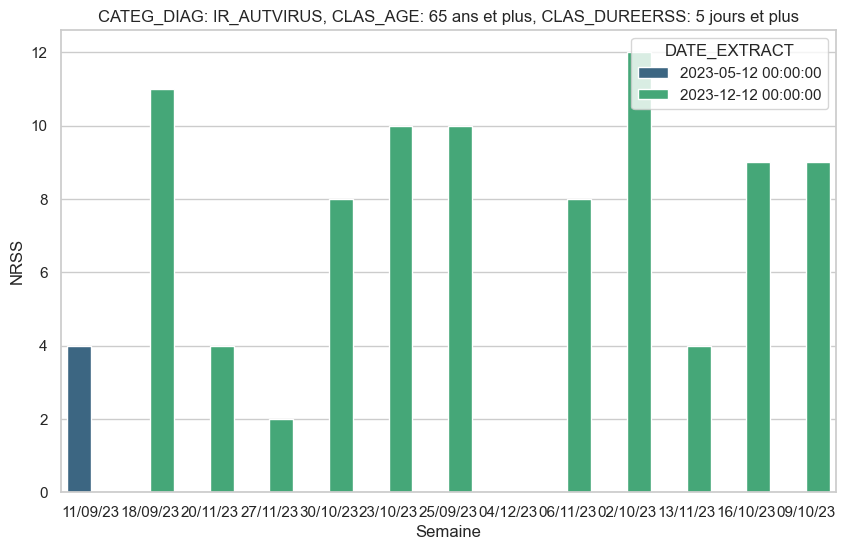

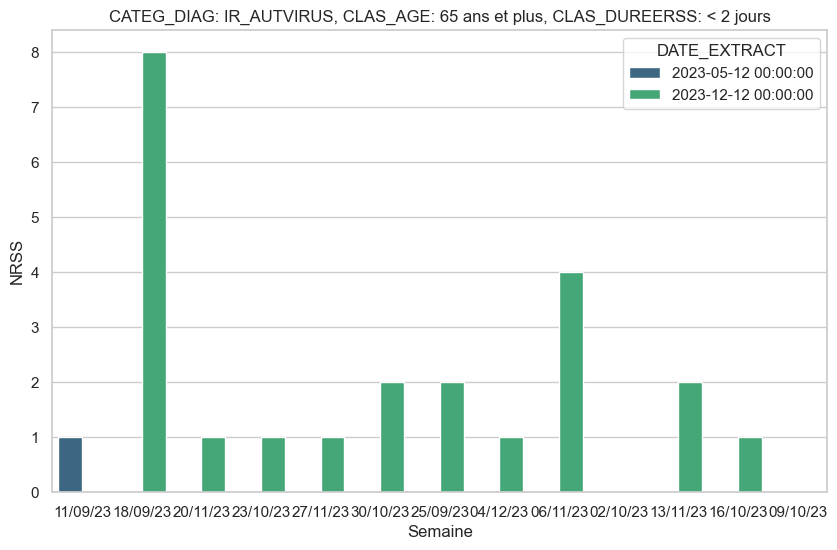

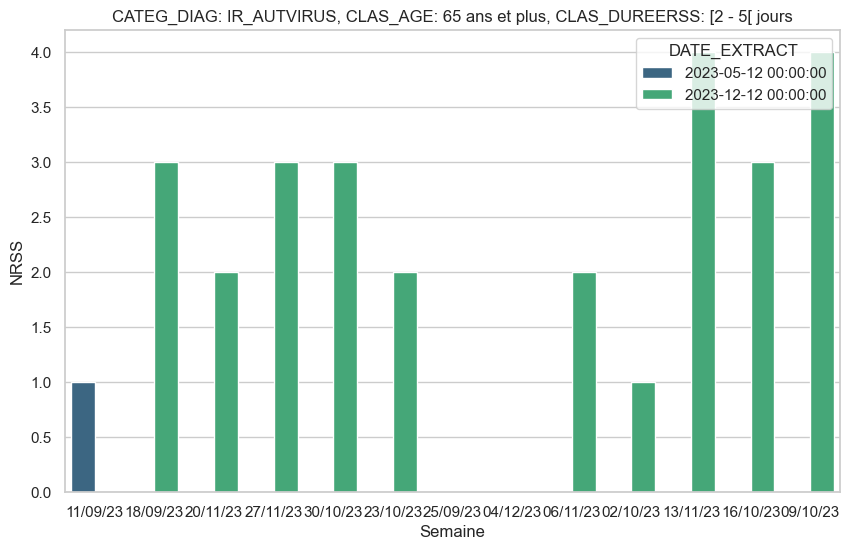

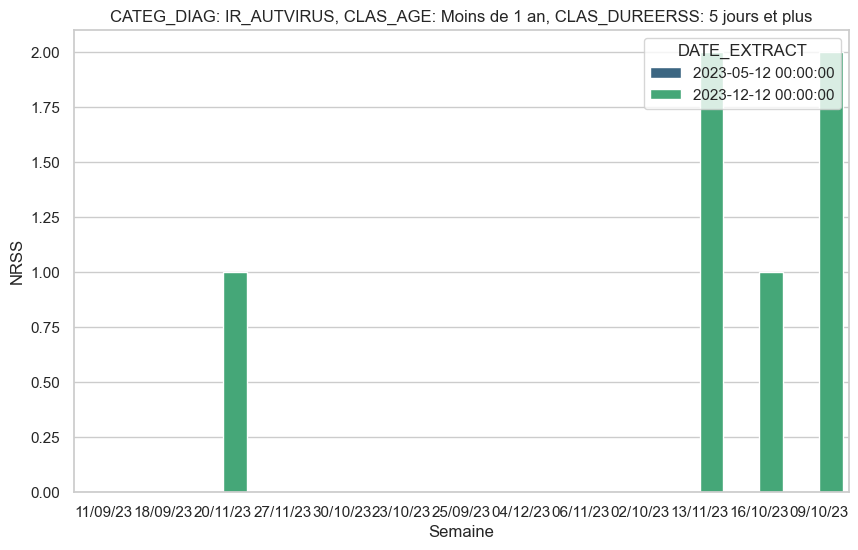

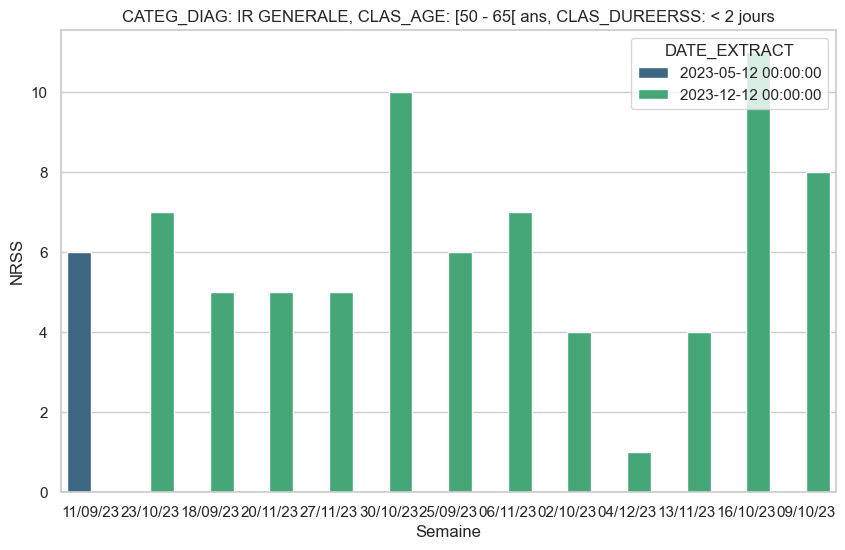

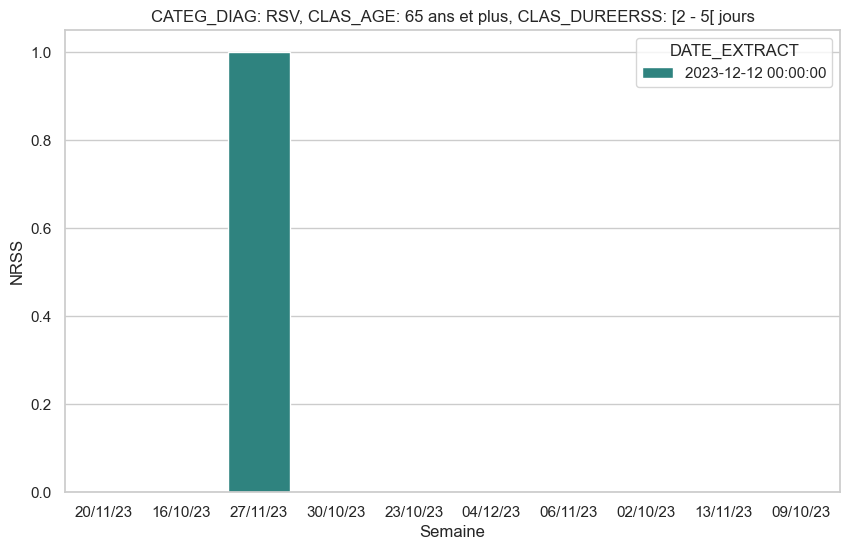

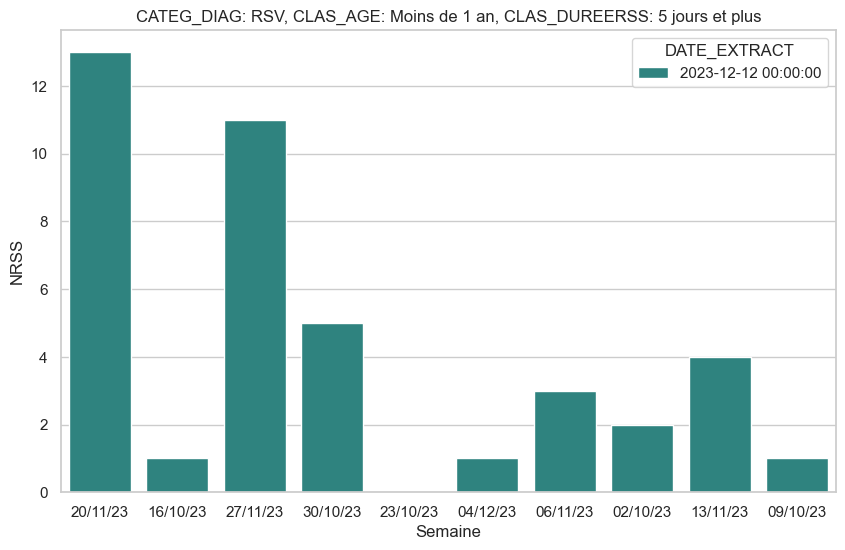

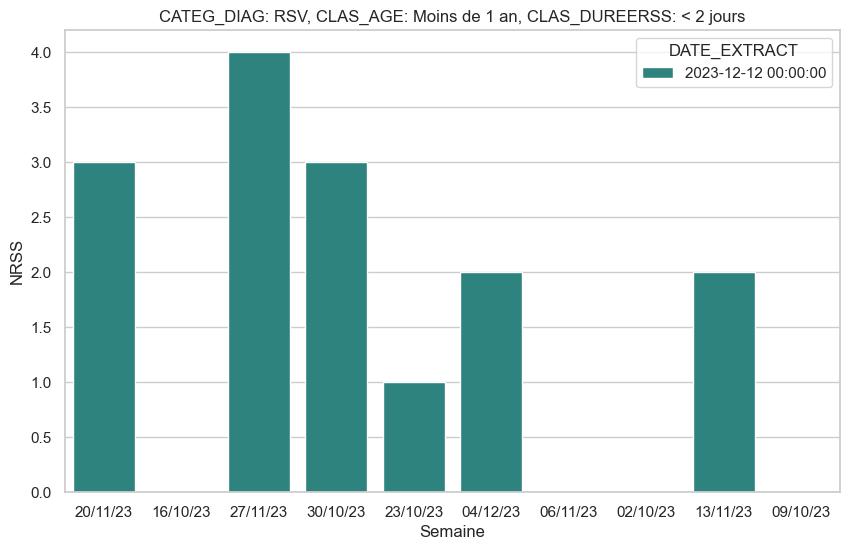

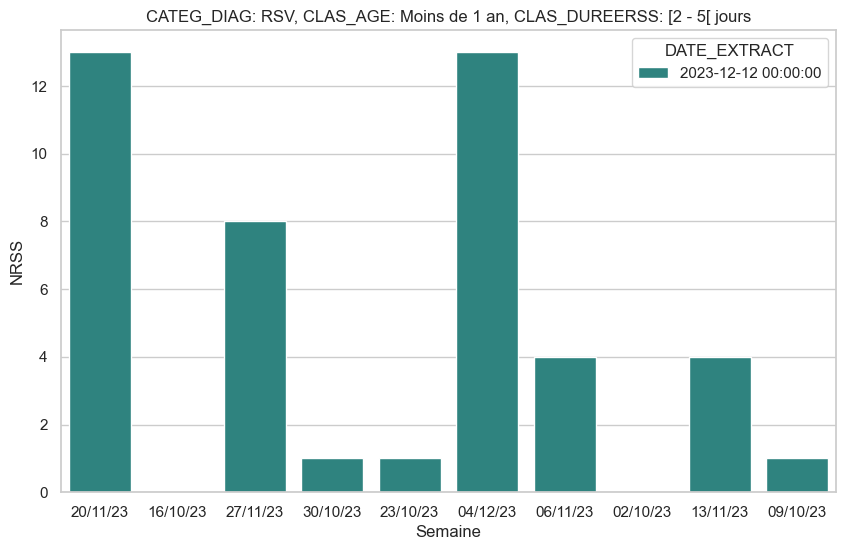

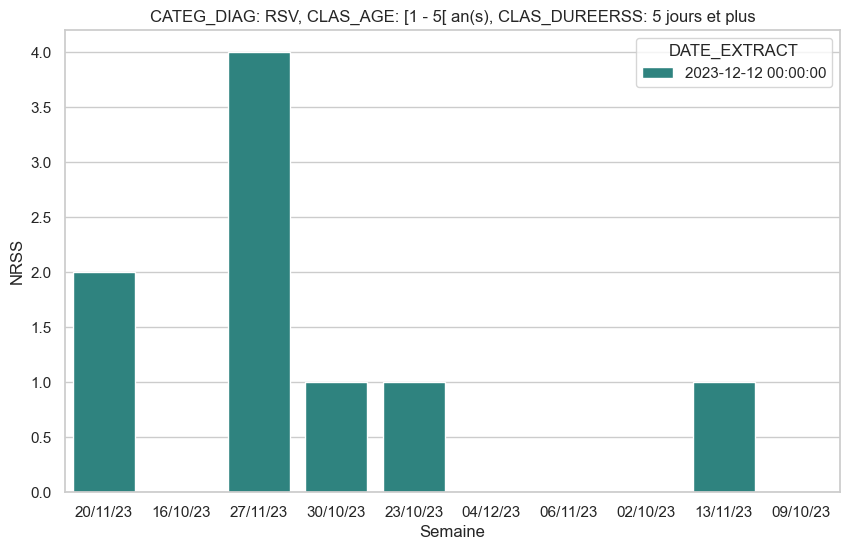

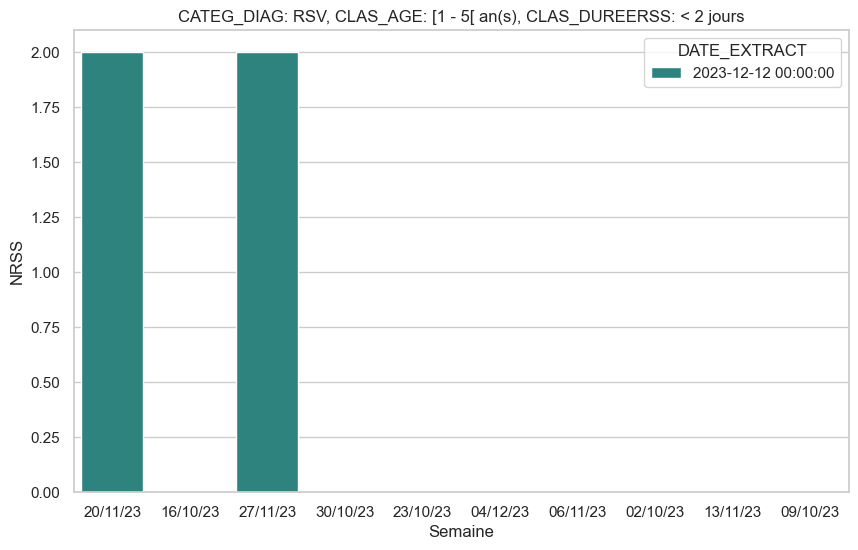

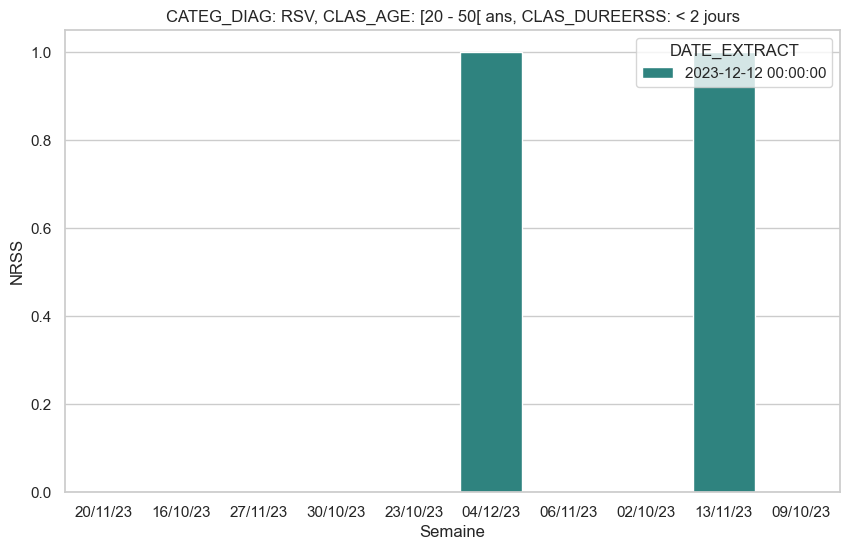

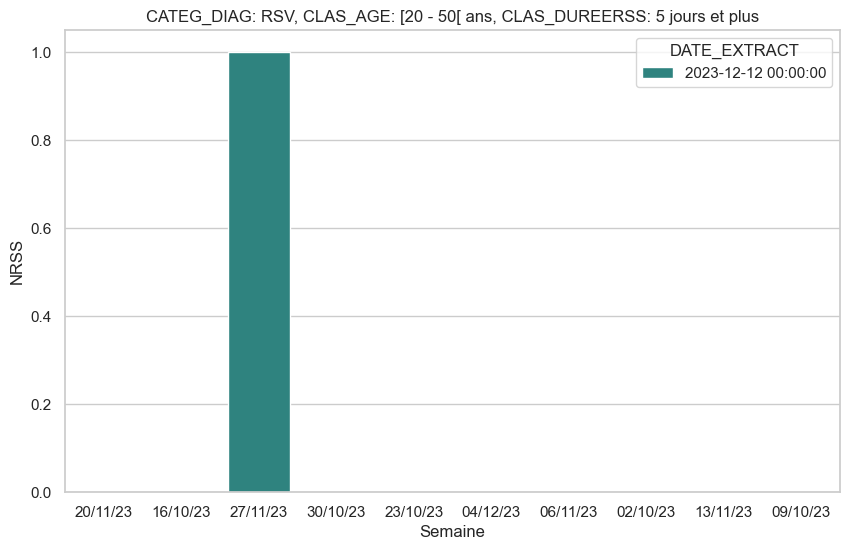

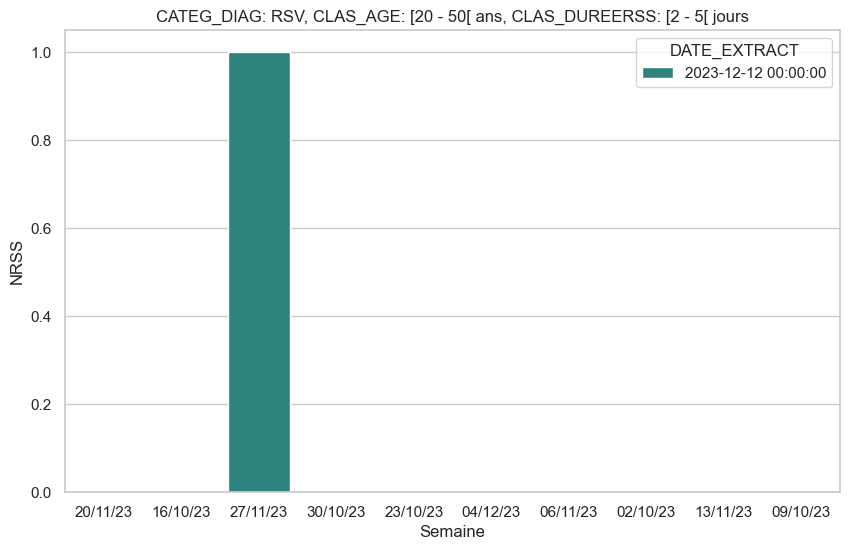

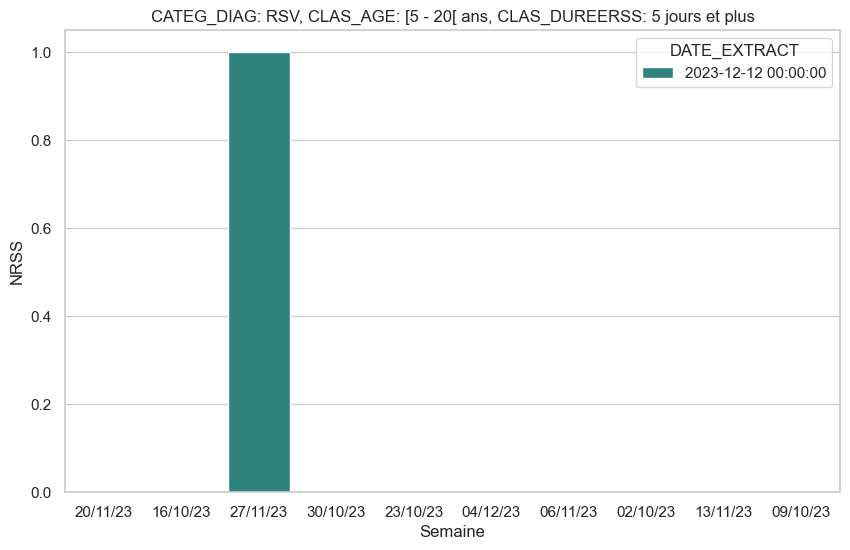

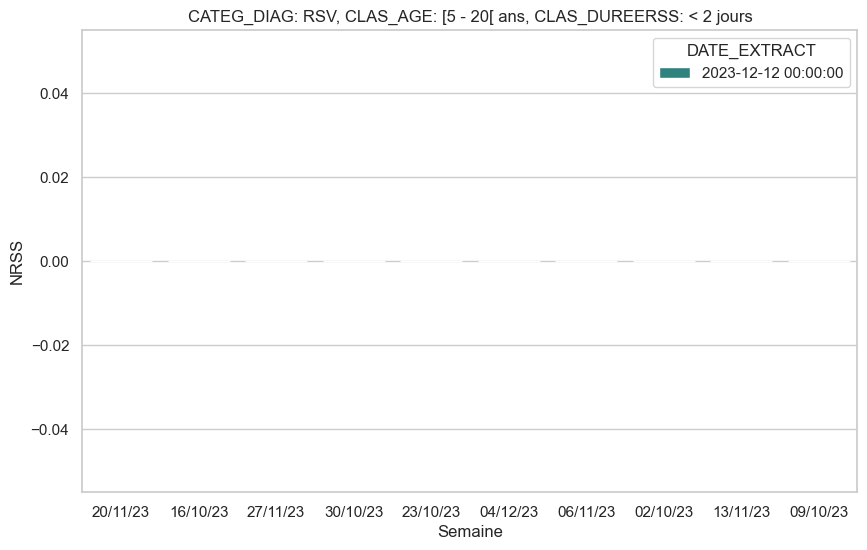

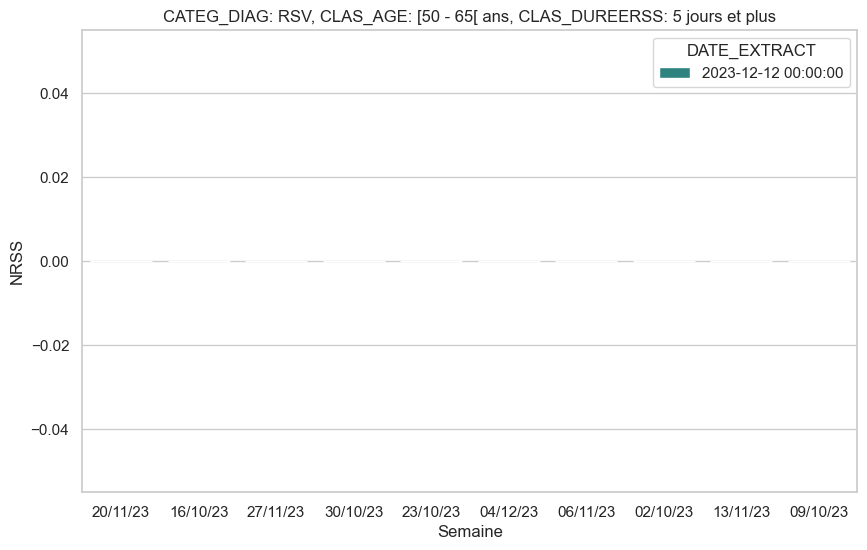

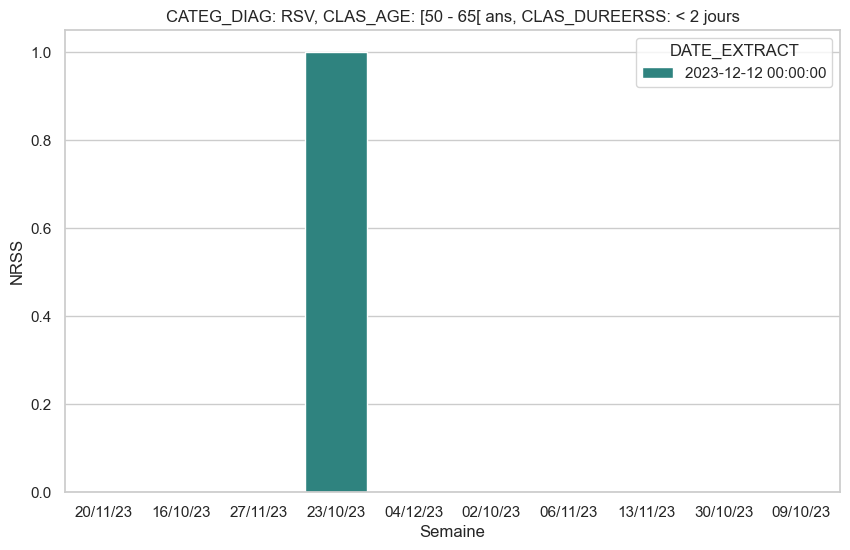

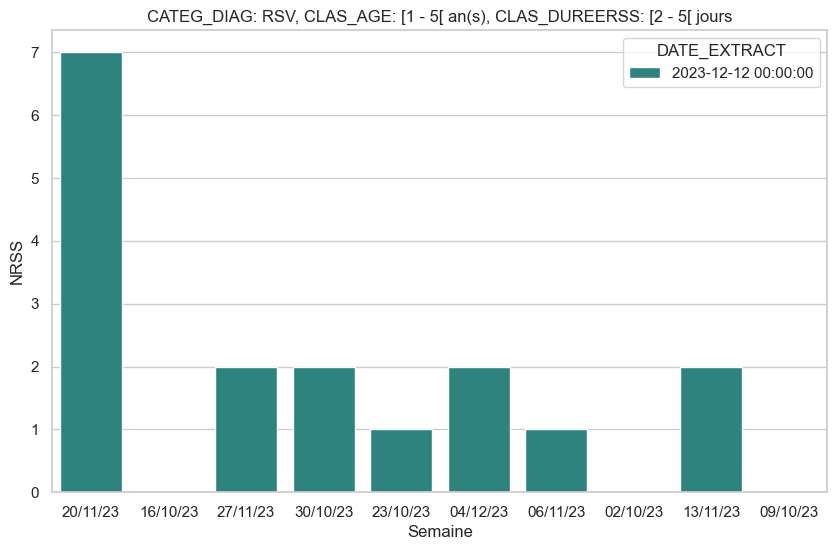

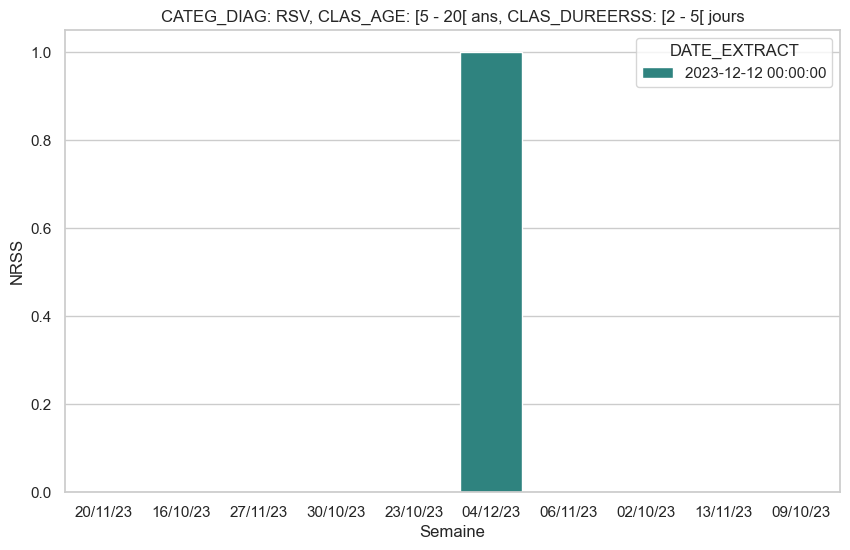

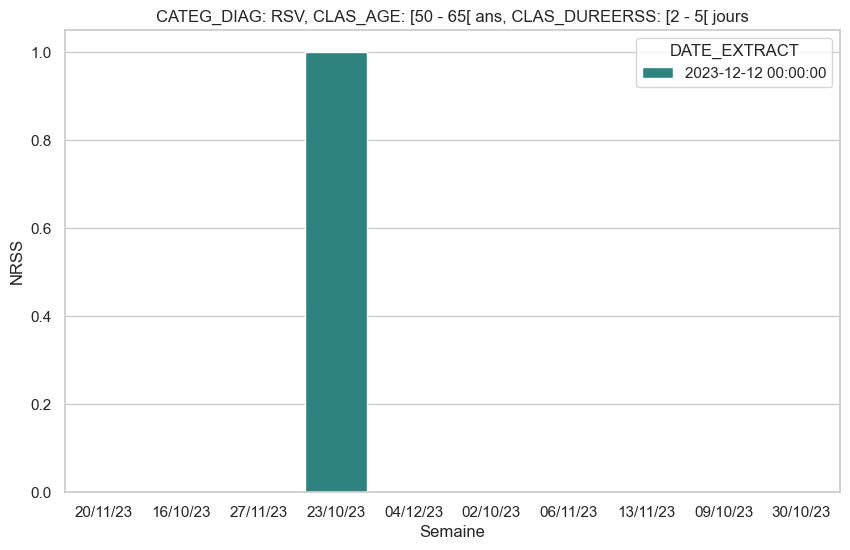

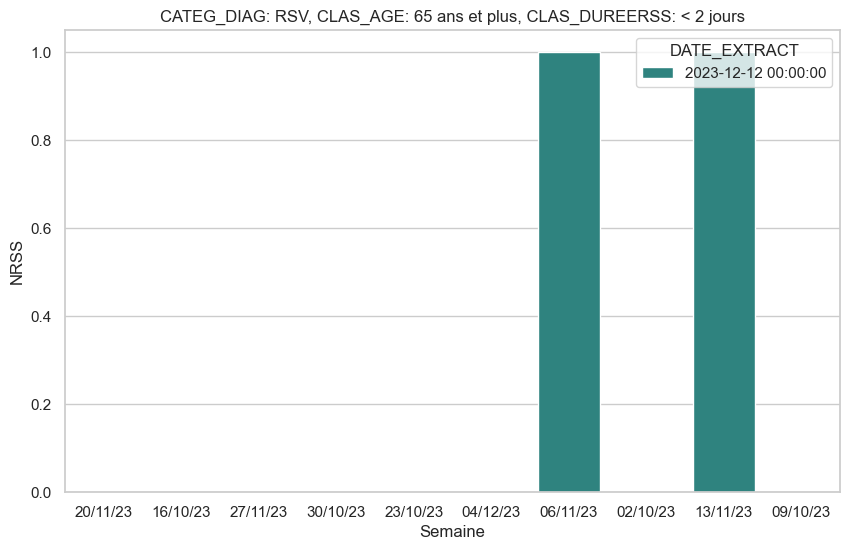

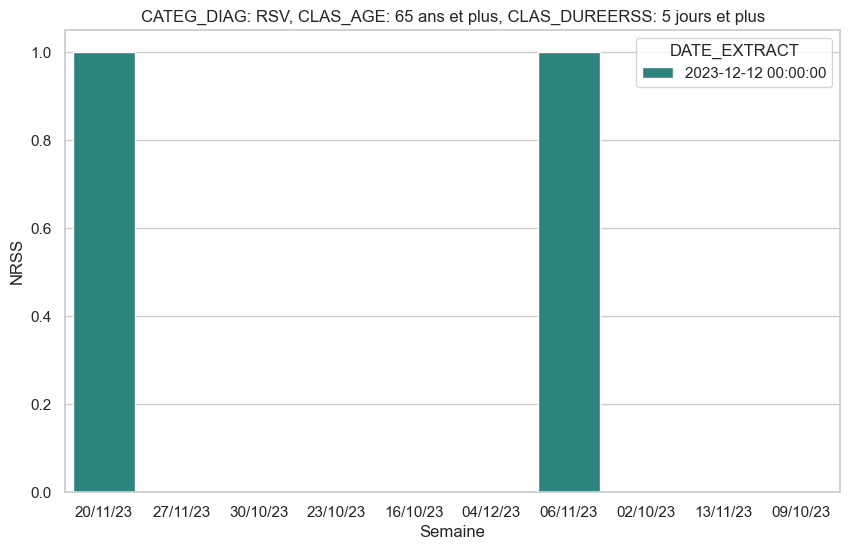

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose df est votre DataFrame contenant les données
# Assurez-vous que DATE_EXTRACT est de type datetime
df['DATE_EXTRACT'] = pd.to_datetime(df['DATE_EXTRACT'])

# Tri du DataFrame par DATE_EXTRACT
df = df.sort_values(by='DATE_EXTRACT')

# Création d'un graphique à barres avec seaborn pour chaque combinaison
sns.set(style="whitegrid")

# Obtenez toutes les combinaisons uniques de CATEG_DIAG, CLAS_AGE, et CLAS_DUREERSS
combinations = df[['CATEG_DIAG', 'CLAS_AGE', 'CLAS_DUREERSS']].drop_duplicates()

# Boucle sur chaque combinaison et créer un graphique
for index, row in combinations.iterrows():
    cat_diag, clas_age, clas_dureerss = row['CATEG_DIAG'], row['CLAS_AGE'], row['CLAS_DUREERSS']
    
    plt.figure(figsize=(10, 6))
    plt.title(f'CATEG_DIAG: {cat_diag}, CLAS_AGE: {clas_age}, CLAS_DUREERSS: {clas_dureerss}')
    
    # Filtrer les données pour la combinaison actuelle
    subset = df[(df['CATEG_DIAG'] == cat_diag) & (df['CLAS_AGE'] == clas_age) & (df['CLAS_DUREERSS'] == clas_dureerss)]
    
    # Tracer le graphique
    sns.barplot(x='LIB_SEM', y='NRSS', hue='DATE_EXTRACT', data=subset, palette='viridis')
    
    plt.xlabel('Semaine')
    plt.ylabel('NRSS')
    plt.legend(title='DATE_EXTRACT', loc='upper right')
    
    # Afficher chaque graphique
    plt.show()
